In [91]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

### CYBERPUNKS

In [92]:
# Read the dataset about cyberpunks parameters
cyberpunks_df=pd.read_csv('cryptopunks.csv')
cyberpunks_df

,Unnamed: 0,rarity_rank,tipus,skin,traits,traits_count,owner
0,0,2023,Female,Mid-skinned,"Blonde Bob, Earring, Green Eye Shadow, Hidden ...",4,0xE08c32
1,1,4352,Male,Dark-skinned,"Mohawk, Smile",2,0xB88F61
2,2,8090,Female,Light-skinned,Wild Hair,1,0x897aEA
3,3,7896,Male,Dark-skinned,"Nerd Glasses, Pipe, Wild Hair",3,0xC352B5
4,4,7332,Male,Mid-skinned,"Big Shades, Earring, Goat, Wild Hair",4,0xC352B5
...,...,...,...,...,...,...,...
9995,9995,2466,Female,Albino-skinned,"Purple Eye Shadow, Straight Hair Dark",2,0x758353
9996,9996,4323,Male,Light-skinned,"Cigarette, Crazy Hair, Earring, Smile",4,0xA9bFA9
9997,9997,498,Zombie,Zombie-skinned,"Cap Forward, Front Beard",2,0x944D32
9998,9998,1271,Female,Mid-skinned,"Black Lipstick, Clown Eyes Green, Wild White Hair",3,0xef764B


In [93]:
cyberpunks_df.drop(cyberpunks_df.columns[[0]], axis=1, inplace=True)
cyberpunks_df

,rarity_rank,tipus,skin,traits,traits_count,owner
0,2023,Female,Mid-skinned,"Blonde Bob, Earring, Green Eye Shadow, Hidden ...",4,0xE08c32
1,4352,Male,Dark-skinned,"Mohawk, Smile",2,0xB88F61
2,8090,Female,Light-skinned,Wild Hair,1,0x897aEA
3,7896,Male,Dark-skinned,"Nerd Glasses, Pipe, Wild Hair",3,0xC352B5
4,7332,Male,Mid-skinned,"Big Shades, Earring, Goat, Wild Hair",4,0xC352B5
...,...,...,...,...,...,...
9995,2466,Female,Albino-skinned,"Purple Eye Shadow, Straight Hair Dark",2,0x758353
9996,4323,Male,Light-skinned,"Cigarette, Crazy Hair, Earring, Smile",4,0xA9bFA9
9997,498,Zombie,Zombie-skinned,"Cap Forward, Front Beard",2,0x944D32
9998,1271,Female,Mid-skinned,"Black Lipstick, Clown Eyes Green, Wild White Hair",3,0xef764B


In [94]:
cyberpunks_df.isnull().sum()

rarity_rank     0
tipus           0
skin            0
traits          8
traits_count    0
owner           0
dtype: int64

In [95]:
cyberpunks_df.duplicated().sum()

0

In [96]:
cyberpunks_df[cyberpunks_df['traits'].isnull()]

,rarity_rank,tipus,skin,traits,traits_count,owner
281,7,Male,Light-skinned,NaN,1,0x6611fE
510,9,Male,Mid-skinned,NaN,1,0x78f026
641,6,Female,Light-skinned,NaN,1,0x69021A
741,5,Male,Dark-skinned,NaN,1,0xB813c6
1050,8,Female,Mid-skinned,NaN,1,0x69021A
2204,4,Female,Dark-skinned,NaN,1,0x577eBC
3307,3,Male,Albino-skinned,NaN,1,0x7224a1
6487,2,Female,Albino-skinned,NaN,1,0x4d8E16


In [97]:
cyberpunks_df.fillna(0, inplace=True)

In [98]:
cyberpunks_df.isnull().sum()

rarity_rank     0
tipus           0
skin            0
traits          0
traits_count    0
owner           0
dtype: int64

In [99]:
cyberpunks_df.loc[[281,510,641,741,1050,2204,3307,6487],'traits_count']=0
cyberpunks_df.loc[[281,510,641,741,1050,2204,3307,6487]]

,rarity_rank,tipus,skin,traits,traits_count,owner
281,7,Male,Light-skinned,0,0,0x6611fE
510,9,Male,Mid-skinned,0,0,0x78f026
641,6,Female,Light-skinned,0,0,0x69021A
741,5,Male,Dark-skinned,0,0,0xB813c6
1050,8,Female,Mid-skinned,0,0,0x69021A
2204,4,Female,Dark-skinned,0,0,0x577eBC
3307,3,Male,Albino-skinned,0,0,0x7224a1
6487,2,Female,Albino-skinned,0,0,0x4d8E16


In [100]:
cyberpunks_df.describe()

,rarity_rank,traits_count
count,10000.00000,10000.000000
mean,5000.50000,2.817500
std,2886.89568,0.912073
min,1.00000,0.000000
25%,2500.75000,2.000000
50%,5000.50000,3.000000
75%,7500.25000,3.000000
max,10000.00000,9.000000


In [101]:
cyberpunks_df.traits_count.value_counts()

3    4280
2    3535
4    1371
5     404
1     333
6      57
7      11
0       8
9       1
Name: traits_count, dtype: int64

#### tipus parameter

In [102]:
tipus_df=pd.DataFrame(cyberpunks_df.tipus.value_counts())
tipus_df

,tipus
Male,6039
Female,3840
Zombie,88
Ape,24
Alien,9


In [103]:
tipus_df.index

Index(['Male', 'Female', 'Zombie', 'Ape', 'Alien'], dtype='object')

In [104]:
tipus_df.columns

Index(['tipus'], dtype='object')

In [105]:
tipus_df.index=tipus_df.index.astype(str)

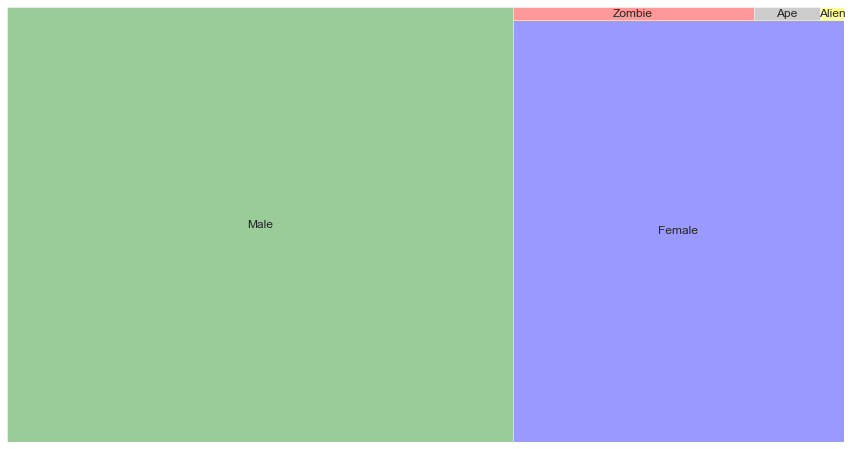

In [106]:
import squarify

sns.set(rc={'figure.figsize':(15,8)})
squarify.plot(sizes=tipus_df.tipus, label=tipus_df.index, color = ['green', 'blue', 'red', 'gray','yellow'] , alpha=.4)
plt.axis('off')
plt.show()

In [107]:
tipus_df.describe()

,tipus
count,5.000000
mean,2000.000000
std,2793.900589
min,9.000000
25%,24.000000
50%,88.000000
75%,3840.000000
max,6039.000000


In [108]:
tipusPercent_df=(tipus_df/((tipus_df.sum())/100))
tipusPercent_df=tipusPercent_df.rename(columns={'tipus':'tipus(%)'})
tipusPercent_df

,tipus(%)
Male,60.39
Female,38.40
Zombie,0.88
Ape,0.24
Alien,0.09


In [109]:
# Para incorporar a informe (Tabla 1)
complete_tipus_df = pd.concat([tipus_df, tipusPercent_df], axis=1)
complete_tipus_df

,tipus,tipus(%)
Male,6039,60.39
Female,3840,38.40
Zombie,88,0.88
Ape,24,0.24
Alien,9,0.09


In [110]:
# Para poder guardar dataframe como file_name.png
import dataframe_image as dfi
dfi.export(complete_tipus_df, 'complete_tipus_df.png')

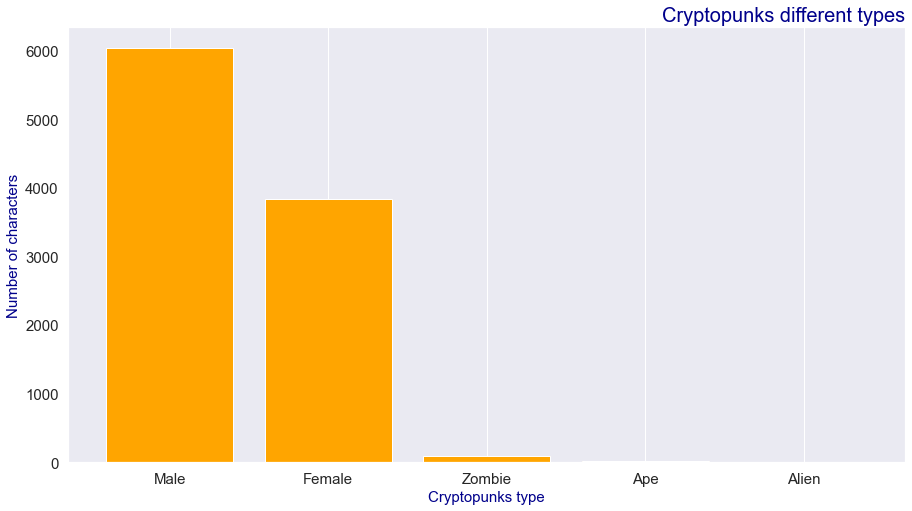

In [111]:
# Para incorporar a informe (Grafico 1)
x = tipus_df.index
y = tipus_df['tipus']
plt.title('Cryptopunks different types', fontsize = 20, loc = 'right', color = 'Darkblue')
plt.xlabel('Cryptopunks type', fontsize = 15 ,color = 'Darkblue')
plt.ylabel('Number of characters', fontsize = 15, color = 'Darkblue')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.grid(axis = 'y')
plt.bar(x, y, color = 'orange');

plt.savefig('complete_tipus_barchart.png', bbox_inches ="tight")
plt.show()

In [112]:
#### traits_count parameter

In [113]:
traitsCount_df=pd.DataFrame(cyberpunks_df.traits_count.value_counts())
traitsCount_df

,traits_count
3,4280
2,3535
4,1371
5,404
1,333
6,57
7,11
0,8
9,1


traitsCount_df2 = traitsCount_df.copy()
traitsCount_df2['traits_count(%)'] = (traitsCount_df['traits_count']/((traitsCount_df['traits_count'].sum())/100))
traitsCount_df2

traitsCount_df2.set_index('traits_total', inplace=True)
traitsCount_df2

import dataframe_image as dfi
dfi.export(traitsCount_df, 'completeTraitsCount_df.png')

traitsCount_df.describe()

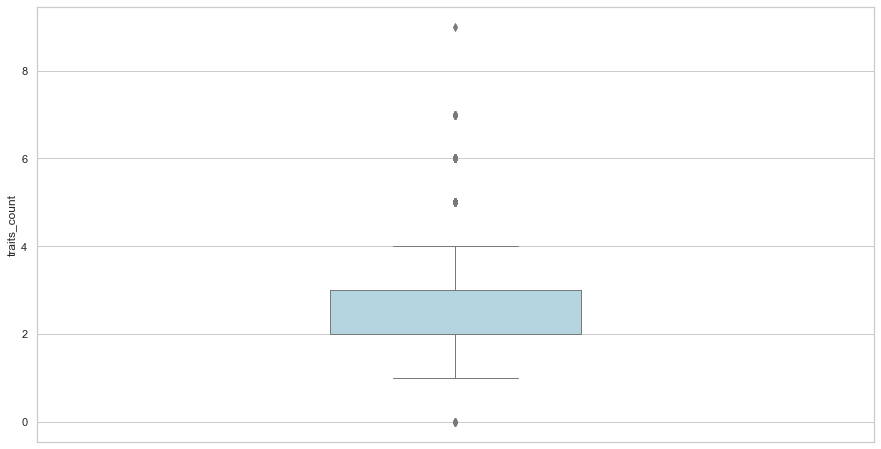

In [114]:
import seaborn as sns

sns.set(style="whitegrid")
ax = sns.boxplot(y=cyberpunks_df["traits_count"], color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3)
plt.savefig('traitsCount.png', dpi = 300)

In [115]:
traitsCount_df.reset_index(level=0, inplace=True)
traitsCount_df = traitsCount_df.rename(columns={'index':'traits_total'})
traitsCount_df

,traits_total,traits_count
0,3,4280
1,2,3535
2,4,1371
3,5,404
4,1,333
5,6,57
6,7,11
7,0,8
8,9,1


In [116]:
dfi.export(traitsCount_df, 'traitsCount_df.png')

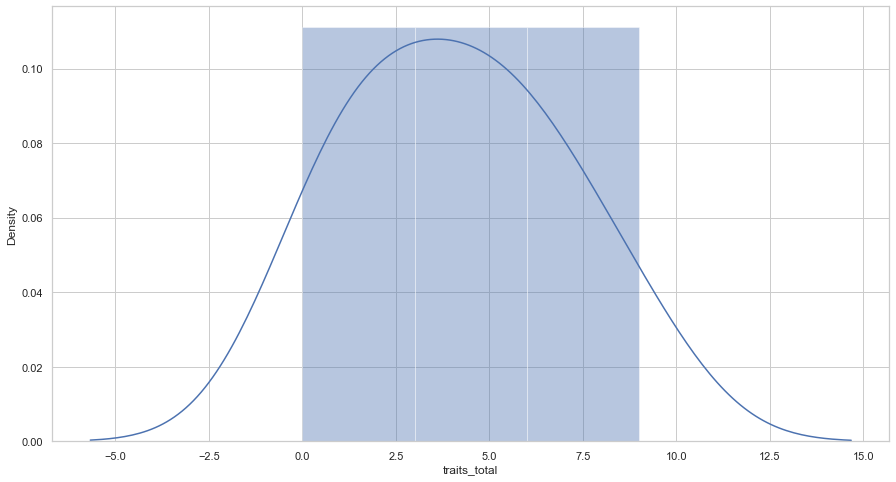

In [117]:
sns.distplot(traitsCount_df['traits_total'])

# Saving the Seaborn Figure:
plt.savefig('traits_total_distplot.png')

In [118]:
traitsCount_df.describe()

,traits_total,traits_count
count,9.000000,9.000000
mean,4.111111,1111.111111
std,2.934469,1653.053799
min,0.000000,1.000000
25%,2.000000,11.000000
50%,4.000000,333.000000
75%,6.000000,1371.000000
max,9.000000,4280.000000


In [119]:
#Para incorporar al informe (Estadístico 2)
dfi.export(traitsCount_df.describe(), 'traitsCount_describe.png')

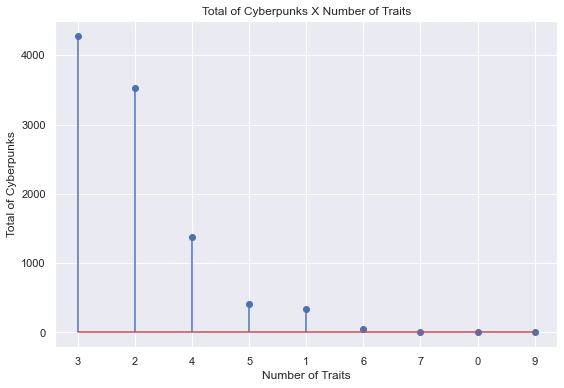

In [120]:
# Para incorporar al informe (Gráfico 2)
my_range=range(0,len(traitsCount_df.traits_total))
sns.set(rc={'figure.figsize':(9,6)})
plt.stem(traitsCount_df['traits_count'])
plt.xticks(my_range, traitsCount_df['traits_total'])
plt.title("Total of Cyberpunks X Number of Traits")
plt.xlabel('Number of Traits')
plt.ylabel('Total of Cyberpunks')
plt.savefig('traitsCount2.png')
plt.show()

#### skin parameter

In [121]:
skin_df=pd.DataFrame(cyberpunks_df.skin.value_counts())
skin_df

,skin
Mid-skinned,3031
Light-skinned,3006
Dark-skinned,2824
Albino-skinned,1018
Zombie-skinned,88
Ape-skinned,24
Alien-skinned,9


In [122]:
skinPercent_df=(skin_df/((skin_df.sum())/100))
skinPercent_df=skinPercent_df.rename(columns={'skin':'skin(%)'})
skinPercent_df

,skin(%)
Mid-skinned,30.31
Light-skinned,30.06
Dark-skinned,28.24
Albino-skinned,10.18
Zombie-skinned,0.88
Ape-skinned,0.24
Alien-skinned,0.09


In [123]:
# Para incorporar a informe (Tabla 3)
complete_skin_df = pd.concat([skin_df, skinPercent_df], axis=1)
complete_skin_df

,skin,skin(%)
Mid-skinned,3031,30.31
Light-skinned,3006,30.06
Dark-skinned,2824,28.24
Albino-skinned,1018,10.18
Zombie-skinned,88,0.88
Ape-skinned,24,0.24
Alien-skinned,9,0.09


In [124]:
#Para incorporar al informe (Tabla 3)
dfi.export(complete_skin_df, 'complete_skin_df.png')

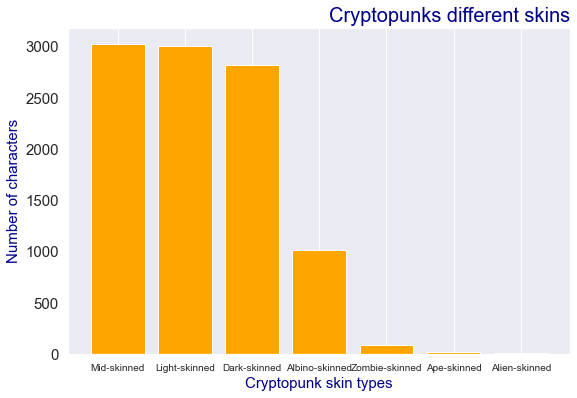

In [125]:
# Para incorporar a informe (Grafico 3)
x = complete_skin_df.index
y = complete_skin_df['skin']
plt.title('Cryptopunks different skins', fontsize = 20, loc = 'right', color = 'Darkblue')
plt.xlabel('Cryptopunk skin types', fontsize = 15 ,color = 'Darkblue')
plt.ylabel('Number of characters', fontsize = 15, color = 'Darkblue')
plt.xticks(fontsize=10)
plt.yticks(fontsize=15)

plt.grid(axis = 'y')
plt.bar(x, y, color = 'orange');

plt.savefig('complete_skin_barchart.png', bbox_inches ="tight")
plt.show()

In [126]:
skinList = ("Midskinned,"*3031)+("Lightskinned,"*3006)+("Darkskinned,"*2824)+("Albinoskinned,"*1018)+("Zombieskinned,"*88)+("Apeskinned,"*24)+("Alienskinned,"*9)
skinList

'Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinned,Midskinne

In [127]:
list

list

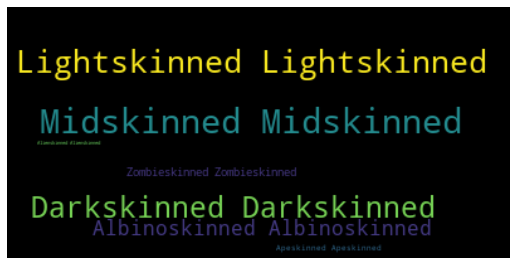

In [128]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a list of word
text=skinList

# Create the wordcloud object
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

#### rarity parameter

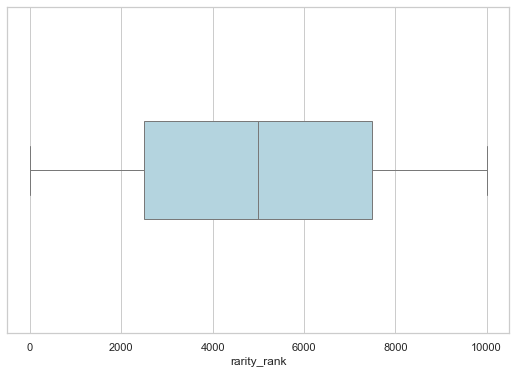

In [129]:
import seaborn as sns

sns.set(style="whitegrid")
ax = sns.boxplot(x=cyberpunks_df["rarity_rank"], color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3)

#### Reltions between parameters

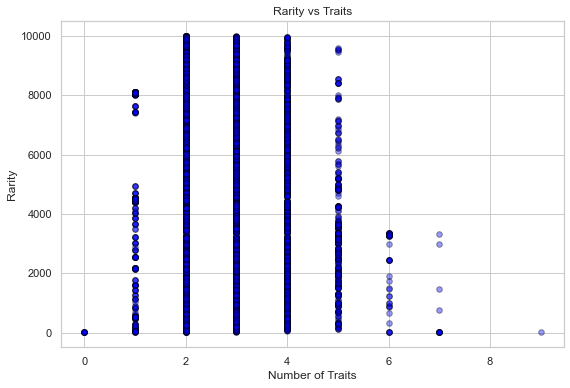

In [130]:
# Create data
y = cyberpunks_df.rarity_rank
x = cyberpunks_df.traits_count
colors = 'Blue'
area = np.pi*10

# Plot
plt.scatter(x, y, s=area, c=colors, alpha=0.4, edgecolors='black')

plt.title('Rarity vs Traits')
plt.xlabel('Number of Traits')
plt.ylabel('Rarity')
plt.show()

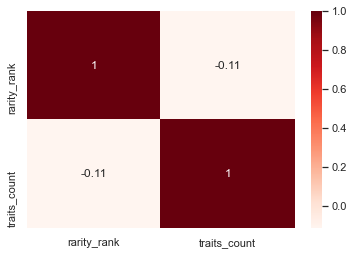

In [131]:
import seaborn as sns

plt.figure(figsize=(6,4))
cor = cyberpunks_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [132]:
print(cyberpunks_df[["rarity_rank","traits_count"]].corr())

              rarity_rank  traits_count
rarity_rank      1.000000     -0.114225
traits_count    -0.114225      1.000000


In [133]:
cyberpunks_df.head(1)

,rarity_rank,tipus,skin,traits,traits_count,owner
0,2023,Female,Mid-skinned,"Blonde Bob, Earring, Green Eye Shadow, Hidden ...",4,0xE08c32


In [134]:
cyberpunks_df.groupby("tipus")["traits_count"].mean()

tipus
Alien     1.888889
Ape       1.750000
Female    2.840885
Male      2.815864
Zombie    2.295455
Name: traits_count, dtype: float64

In [135]:
skinDollar_df=cyberpunks_df.groupby("skin")["AmountDollar"].mean()
skinDollar_df

KeyError: 'Column not found: AmountDollar'

In [137]:
cyberpunks_df.groupby("skin")["traits_count"].mean()

skin
Albino-skinned    2.634578
Alien-skinned     1.888889
Ape-skinned       1.750000
Dark-skinned      2.837465
Light-skinned     2.826680
Mid-skinned       2.877598
Zombie-skinned    2.295455
Name: traits_count, dtype: float64

In [138]:
cyberpunks_df.groupby(["tipus","skin"])["rarity_rank"].count()

tipus   skin          
Alien   Alien-skinned        9
Ape     Ape-skinned         24
Female  Albino-skinned     420
        Dark-skinned      1101
        Light-skinned     1145
        Mid-skinned       1174
Male    Albino-skinned     598
        Dark-skinned      1723
        Light-skinned     1861
        Mid-skinned       1857
Zombie  Zombie-skinned      88
Name: rarity_rank, dtype: int64

In [139]:
cyberpunks_df.groupby("tipus")["rarity_rank"].mean()

tipus
Alien       14.000000
Ape         41.500000
Female    4314.186458
Male      5529.366948
Zombie     517.670455
Name: rarity_rank, dtype: float64

In [140]:
tipusRarity_df=pd.DataFrame(cyberpunks_df.groupby("tipus")["rarity_rank"].mean())
tipusRarity_df

,rarity_rank
tipus,
Alien,14.000000
Ape,41.500000
Female,4314.186458
Male,5529.366948
Zombie,517.670455


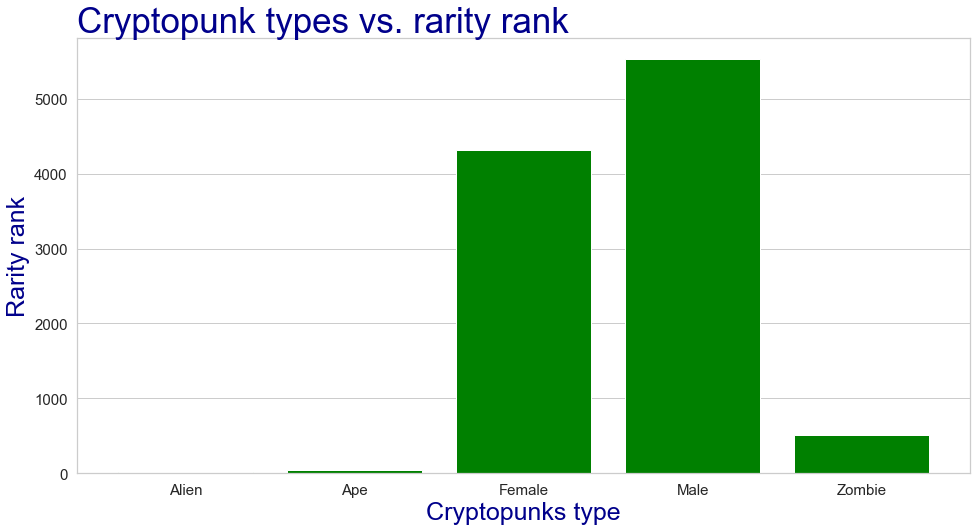

In [141]:
# Para incorporar a informe (Grafico 1)

plt.figure(figsize=(16,8))
x = tipusRarity_df.index
y = tipusRarity_df['rarity_rank']
plt.title('Cryptopunk types vs. rarity rank', fontsize = 35, loc = 'left', color = 'Darkblue')
plt.xlabel('Cryptopunks type', fontsize = 25 ,color = 'Darkblue')
plt.ylabel('Rarity rank', fontsize = 25, color = 'Darkblue')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.grid(axis = 'x')
plt.bar(x, y, color = 'green');

plt.savefig('tipusRarity.png', bbox_inches ="tight", dpi=300)
plt.show()

In [142]:
# Para poder guardar dataframe como file_name.png
import dataframe_image as dfi
dfi.export(tipusRarity_df, 'tipusRarity_df.png')

In [143]:
cyberpunks_df.groupby("skin")["rarity_rank"].mean()

skin
Albino-skinned    5352.840864
Alien-skinned       14.000000
Ape-skinned         41.500000
Dark-skinned      5028.654391
Light-skinned     5026.862941
Mid-skinned       5014.008908
Zombie-skinned     517.670455
Name: rarity_rank, dtype: float64

### TRANSACTIONS

In [144]:
# Para poder guardar dataframe como file_name.png
import dataframe_image as dfi
dfi.export(tipusRarity_df, 'tipusRarity_df.png')

In [145]:
# Read the dataset about cyberpunks transactions
transactions_df=pd.read_csv('Transactions_clean.csv')
transactions_df

,Unnamed: 0,idTransaction,idPropietario,TypeTransaction,idCryptoPunk,Owner,Reciever,AmountETH,AmountDollar,Date
0,0,0,0xe73a1d,Bid Withdrawn,0,0xe73a1d,NaN,321.00,1260000.0,2021-09-04
1,1,1,0xe73a1d,Bid,0,0xe73a1d,NaN,321.00,1140000.0,2021-09-01
2,2,2,0x2e5e22,Bid Withdrawn,0,0x2e5e22,NaN,320.00,1110000.0,2021-09-01
3,3,3,0x2e5e22,Bid,0,0x2e5e22,NaN,320.00,1100000.0,2021-09-01
4,4,4,0x2e5e22,Bid Withdrawn,0,0x2e5e22,NaN,263.00,904481.0,2021-09-01
...,...,...,...,...,...,...,...,...,...,...
161280,161329,161329,0xa0a59c,Bid,9999,0xa0a59c,NaN,0.25,69.0,2017-07-03
161281,161330,161330,0x717403,Bid,9999,0x717403,NaN,0.20,51.0,2017-06-26
161282,161331,161331,ddaavvee,Bid,9999,ddaavvee,NaN,0.20,65.0,2017-06-23
161283,161332,161332,0x5b098b,Bid,9999,0x5b098b,NaN,0.15,50.0,2017-06-23


In [146]:
transactions_df.drop(transactions_df.columns[[0]], axis=1, inplace=True)
transactions_df

,idTransaction,idPropietario,TypeTransaction,idCryptoPunk,Owner,Reciever,AmountETH,AmountDollar,Date
0,0,0xe73a1d,Bid Withdrawn,0,0xe73a1d,NaN,321.00,1260000.0,2021-09-04
1,1,0xe73a1d,Bid,0,0xe73a1d,NaN,321.00,1140000.0,2021-09-01
2,2,0x2e5e22,Bid Withdrawn,0,0x2e5e22,NaN,320.00,1110000.0,2021-09-01
3,3,0x2e5e22,Bid,0,0x2e5e22,NaN,320.00,1100000.0,2021-09-01
4,4,0x2e5e22,Bid Withdrawn,0,0x2e5e22,NaN,263.00,904481.0,2021-09-01
...,...,...,...,...,...,...,...,...,...
161280,161329,0xa0a59c,Bid,9999,0xa0a59c,NaN,0.25,69.0,2017-07-03
161281,161330,0x717403,Bid,9999,0x717403,NaN,0.20,51.0,2017-06-26
161282,161331,ddaavvee,Bid,9999,ddaavvee,NaN,0.20,65.0,2017-06-23
161283,161332,0x5b098b,Bid,9999,0x5b098b,NaN,0.15,50.0,2017-06-23


In [147]:
import dataframe_image as dfi
dfi.export(transactions_df, 'transactions_df.png', max_rows = 20)

In [148]:
transact_df = transactions_df.copy()

In [149]:
typesTransact = pd.DataFrame(transact_df.TypeTransaction.value_counts())
typesTransact

,TypeTransaction
Offered,62822
Bid,25923
Sold,18425
Bid Withdrawn,15630
Transfer,13484
Claimed,10000
Offer Withdrawn,9718
(Wrap),2763
(Unwrap),2520


In [150]:
typesTransact.reset_index(level=0, inplace=True)
typesTransact = typesTransact.rename(columns={'index':'TransactionType','TypeTransaction':'typeSum'})
typesTransact

,TransactionType,typeSum
0,Offered,62822
1,Bid,25923
2,Sold,18425
3,Bid Withdrawn,15630
4,Transfer,13484
5,Claimed,10000
6,Offer Withdrawn,9718
7,(Wrap),2763
8,(Unwrap),2520


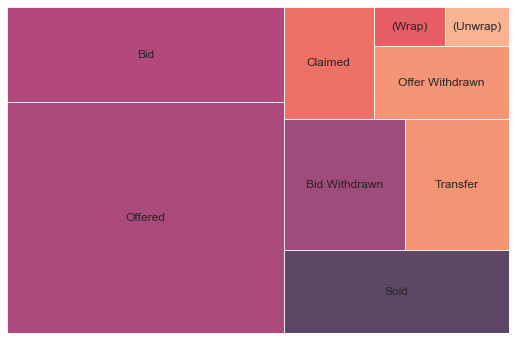

In [151]:
# plot it
squarify.plot(sizes=typesTransact["typeSum"], label=typesTransact["TransactionType"], alpha=.8 )
plt.axis('off')
plt.show()

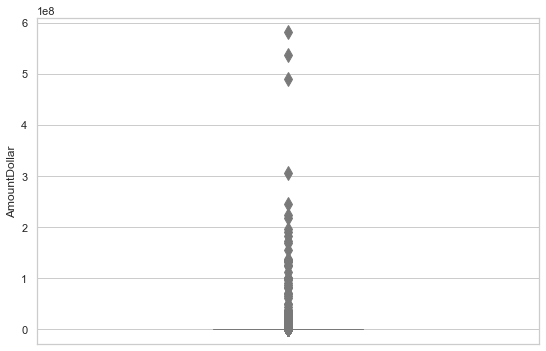

In [152]:
ax = sns.boxplot(y="AmountDollar", data=transact_df,  color='lightblue', fliersize=10,  orient='v', linewidth=1 , width=0.3)
#ax = sns.swarmplot(y="AmountDollar", data=transact_df, color="darkblue", orient="v", size=4)

In [153]:
transact_df.isnull().sum()

idTransaction           0
idPropietario       71822
TypeTransaction         0
idCryptoPunk            0
Owner               82540
Reciever           113376
AmountETH               0
AmountDollar            0
Date                    0
dtype: int64

In [154]:
transact_df.fillna(0, inplace=True)

In [155]:
transact_df.isnull().sum()

idTransaction      0
idPropietario      0
TypeTransaction    0
idCryptoPunk       0
Owner              0
Reciever           0
AmountETH          0
AmountDollar       0
Date               0
dtype: int64

In [156]:
transact_df.duplicated().sum()

0

In [157]:
transact_df.describe()

,idTransaction,idCryptoPunk,AmountETH,AmountDollar
count,161285.000000,161285.000000,161285.000000,1.612850e+05
mean,80669.917872,5317.588269,69.202206,1.418266e+05
std,46574.389486,2779.883907,3747.753149,3.118454e+06
min,0.000000,0.000000,0.000000,0.000000e+00
25%,40335.000000,2979.000000,0.020000,1.100000e+01
50%,80671.000000,5396.000000,6.660000,4.376000e+03
75%,121006.000000,7705.000000,34.000000,7.453800e+04
max,161333.000000,9999.000000,1000000.000000,5.812800e+08


In [158]:
transact_df[transact_df.TypeTransaction='Sold'].

SyntaxError: invalid syntax (<ipython-input-158-7cd5768839a3>, line 1)

In [160]:
transact_df[transact_df.TypeTransaction == 'Offered'].describe()

,idTransaction,idCryptoPunk,AmountETH,AmountDollar
count,62822.000000,62822.000000,62822.000000,6.282200e+04
mean,82705.865000,5444.106237,151.471986,2.998379e+05
std,45865.414433,2727.085873,6003.469788,4.987627e+06
min,24.000000,0.000000,0.000000,0.000000e+00
25%,43566.250000,3166.000000,8.000000,4.370250e+03
50%,83305.500000,5567.000000,28.990000,6.042600e+04
75%,122188.750000,7765.000000,69.420000,1.758210e+05
max,161326.000000,9999.000000,1000000.000000,5.812800e+08


In [161]:
transact_df[transact_df.TypeTransaction == 'Bid'].describe()

,idTransaction,idCryptoPunk,AmountETH,AmountDollar
count,25923.000000,25923.000000,25923.000000,2.592300e+04
mean,78434.232188,5176.213594,25.177171,6.010551e+04
std,47580.891338,2853.316164,88.627827,2.278365e+05
min,1.000000,0.000000,0.000000,0.000000e+00
25%,36333.500000,2761.000000,0.300000,8.800000e+01
50%,78273.000000,5253.000000,6.000000,5.581000e+03
75%,119808.500000,7637.000000,25.000000,5.333050e+04
max,161332.000000,9999.000000,4200.000000,7.950000e+06


In [162]:
transact_df[transact_df.TypeTransaction == 'Sold'].describe()

,idTransaction,idCryptoPunk,AmountETH,AmountDollar
count,18425.000000,18425.000000,18425.000000,1.842500e+04
mean,81921.399294,5402.352239,26.572926,6.794251e+04
std,44869.316375,2664.009801,66.867984,1.683393e+05
min,22.000000,0.000000,0.000000,0.000000e+00
25%,43489.000000,3161.000000,1.400000,3.800000e+02
50%,81338.000000,5433.000000,14.650000,2.670200e+04
75%,120976.000000,7702.000000,29.990000,6.854300e+04
max,161279.000000,9998.000000,4200.000000,7.580000e+06


In [163]:
transact_df.groupby("TypeTransaction")["AmountETH"].mean()

TypeTransaction
(Unwrap)             0.000000
(Wrap)               0.000000
Bid                 25.177171
Bid Withdrawn       32.196468
Claimed              0.000000
Offer Withdrawn      0.000000
Offered            151.471986
Sold                26.572926
Transfer             0.000000
Name: AmountETH, dtype: float64

In [164]:
transact_df.groupby("TypeTransaction")["AmountETH"].median()

TypeTransaction
(Unwrap)            0.00
(Wrap)              0.00
Bid                 6.00
Bid Withdrawn      14.00
Claimed             0.00
Offer Withdrawn     0.00
Offered            28.99
Sold               14.65
Transfer            0.00
Name: AmountETH, dtype: float64

In [165]:
transact_df.groupby("TypeTransaction")["AmountDollar"].mean()

TypeTransaction
(Unwrap)                0.000000
(Wrap)                  0.000000
Bid                 60105.511476
Bid Withdrawn       78574.674157
Claimed                 0.000000
Offer Withdrawn         0.000000
Offered            299837.916059
Sold                67942.507967
Transfer                0.000000
Name: AmountDollar, dtype: float64

In [166]:
transact_df.groupby("TypeTransaction")["AmountDollar"].median()

TypeTransaction
(Unwrap)               0.0
(Wrap)                 0.0
Bid                 5581.0
Bid Withdrawn      26818.0
Claimed                0.0
Offer Withdrawn        0.0
Offered            60426.0
Sold               26702.0
Transfer               0.0
Name: AmountDollar, dtype: float64

In [167]:
transact_df.groupby("TypeTransaction")["AmountDollar"].var()

TypeTransaction
(Unwrap)           0.000000e+00
(Wrap)             0.000000e+00
Bid                5.190947e+10
Bid Withdrawn      7.285500e+10
Claimed            0.000000e+00
Offer Withdrawn    0.000000e+00
Offered            2.487643e+13
Sold               2.833811e+10
Transfer           0.000000e+00
Name: AmountDollar, dtype: float64

In [168]:
transact_df.head(1)

,idTransaction,idPropietario,TypeTransaction,idCryptoPunk,Owner,Reciever,AmountETH,AmountDollar,Date
0,0,0xe73a1d,Bid Withdrawn,0,0xe73a1d,0,321.0,1260000.0,2021-09-04


In [169]:
sold_df = transact_df[transact_df.TypeTransaction == 'Sold']

In [170]:
sold_df.Date.value_counts()

2021-08-23    354
2021-07-30    337
2020-09-24    327
2020-09-28    312
2021-08-28    307
             ... 
2020-02-04      1
2019-02-10      1
2017-10-29      1
2017-08-07      1
2020-11-29      1
Name: Date, Length: 1150, dtype: int64

In [171]:
soldDates=pd.DataFrame(sold_df.groupby("Date")["AmountDollar"].median())
soldDates

,AmountDollar
Date,
2017-06-23,31.0
2017-06-24,53.5
2017-06-25,38.0
2017-06-26,24.5
2017-06-27,43.5
...,...
2021-09-04,395299.0
2021-09-05,390640.0
2021-09-06,393122.5


In [172]:
soldDates.reset_index(level=0, inplace=True)
soldDates

,Date,AmountDollar
0,2017-06-23,31.0
1,2017-06-24,53.5
2,2017-06-25,38.0
3,2017-06-26,24.5
4,2017-06-27,43.5
...,...,...
1145,2021-09-04,395299.0
1146,2021-09-05,390640.0
1147,2021-09-06,393122.5
1148,2021-09-07,394065.5


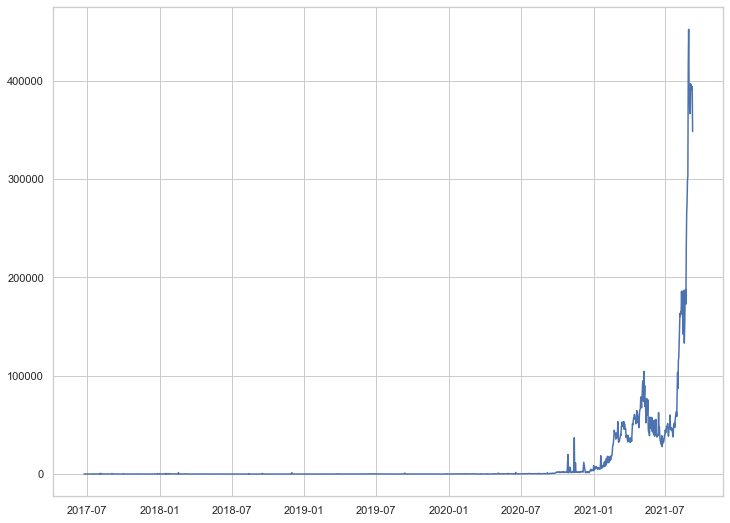

In [173]:
soldDates["Date"] = pd.to_datetime(soldDates["Date"])

date = soldDates["Date"]
value = soldDates["AmountDollar"]

fig, ax = plt.subplots(figsize=(12, 9))
ax.plot(date, value);

In [174]:
soldDatesETH=pd.DataFrame(sold_df.groupby("Date")["AmountDollar","AmountETH"].median())
soldDatesETH

,AmountDollar,AmountETH
Date,,
2017-06-23,31.0,0.095
2017-06-24,53.5,0.175
2017-06-25,38.0,0.140
2017-06-26,24.5,0.095
2017-06-27,43.5,0.150
...,...,...
2021-09-04,395299.0,102.000
2021-09-05,390640.0,100.000
2021-09-06,393122.5,100.000


In [175]:
soldDatesETH.reset_index(level=0, inplace=True)
soldDatesETH.head(1)

,Date,AmountDollar,AmountETH
0,2017-06-23,31.0,0.095


#### Ethereum

In [177]:
# Ethereum Historical Data
# Source: https://www.investing.com/crypto/ethereum/historical-data

ethereum_df=pd.read_csv('ethereumHistoricalData.csv')
ethereum_df

,Date,Price,Open,High,Low,Vol.,Change %
0,"Sep 08, 2021","3,495.10","3,424.35","3,557.67","3,221.60",780.68K,2.10%
1,"Sep 07, 2021","3,423.12","3,926.84","3,945.79","3,061.30",2.47M,-12.84%
2,"Sep 06, 2021","3,927.21","3,950.20","3,968.20","3,867.55",764.56K,-0.59%
3,"Sep 05, 2021","3,950.62","3,885.40","3,981.22","3,834.74",714.16K,1.69%
4,"Sep 04, 2021","3,884.97","3,938.45","3,968.33","3,844.07",672.53K,-1.30%
...,...,...,...,...,...,...,...
1534,"Jun 27, 2017",279.00,251.30,279.00,204.11,1.09M,11.02%
1535,"Jun 26, 2017",251.30,277.00,286.85,214.99,1.36M,-9.28%
1536,"Jun 25, 2017",277.00,296.89,306.39,253.20,508.55K,-6.70%
1537,"Jun 24, 2017",296.89,324.37,327.55,291.53,195.47K,-8.47%


In [178]:
ethereum_df["Date"] = pd.to_datetime(ethereum_df["Date"])
ethereum_df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-09-08,"3,495.10","3,424.35","3,557.67","3,221.60",780.68K,2.10%
1,2021-09-07,"3,423.12","3,926.84","3,945.79","3,061.30",2.47M,-12.84%
2,2021-09-06,"3,927.21","3,950.20","3,968.20","3,867.55",764.56K,-0.59%
3,2021-09-05,"3,950.62","3,885.40","3,981.22","3,834.74",714.16K,1.69%
4,2021-09-04,"3,884.97","3,938.45","3,968.33","3,844.07",672.53K,-1.30%


In [179]:
ethereum_df[ethereum_df.columns[1:5]] = ethereum_df[ethereum_df.columns[1:5]].replace('[,]', '', regex=True).astype(float)

In [180]:
ethereum_df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-09-08,3495.10,3424.35,3557.67,3221.60,780.68K,2.10%
1,2021-09-07,3423.12,3926.84,3945.79,3061.30,2.47M,-12.84%
2,2021-09-06,3927.21,3950.20,3968.20,3867.55,764.56K,-0.59%
3,2021-09-05,3950.62,3885.40,3981.22,3834.74,714.16K,1.69%
4,2021-09-04,3884.97,3938.45,3968.33,3844.07,672.53K,-1.30%


In [181]:
ethereum_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1539 entries, 0 to 1538
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1539 non-null   datetime64[ns]
 1   Price     1539 non-null   float64       
 2   Open      1539 non-null   float64       
 3   High      1539 non-null   float64       
 4   Low       1539 non-null   float64       
 5   Vol.      1539 non-null   object        
 6   Change %  1539 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 84.3+ KB


In [182]:
ethereum_df.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

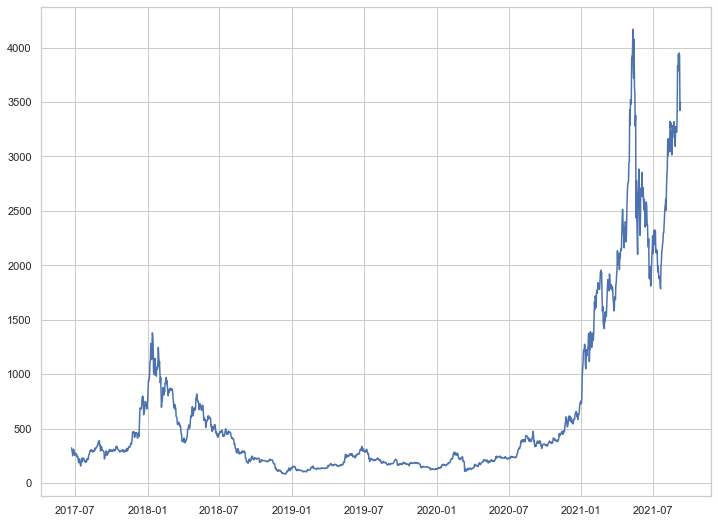

In [183]:
dateEth = ethereum_df["Date"]
valueEth = ethereum_df["Price"]

fig, ax = plt.subplots(figsize=(12, 9))
ax.plot(dateEth, valueEth);

In [184]:
transactions_df['Date'] = pd.to_datetime(transactions_df['Date'])
ethereum_df['Date'] = pd.to_datetime(ethereum_df['Date'])
concatValues_df = pd.merge(transactions_df, ethereum_df, how='inner', left_on='Date', right_on='Date')
concatValues_df

,idTransaction,idPropietario,TypeTransaction,idCryptoPunk,Owner,Reciever,AmountETH,AmountDollar,Date,Price,Open,High,Low,Vol.,Change %
0,0,0xe73a1d,Bid Withdrawn,0,0xe73a1d,NaN,321.00,1260000.0,2021-09-04,3884.97,3938.45,3968.33,3844.07,672.53K,-1.30%
1,41,0xe73a1d,Bid Withdrawn,1,0xe73a1d,NaN,198.00,777132.0,2021-09-04,3884.97,3938.45,3968.33,3844.07,672.53K,-1.30%
2,179,snoopalo…,Bid,6,snoopalo…,NaN,1.00,3923.0,2021-09-04,3884.97,3938.45,3968.33,3844.07,672.53K,-1.30%
3,393,snoopalo…,Bid,28,snoopalo…,NaN,0.50,1962.0,2021-09-04,3884.97,3938.45,3968.33,3844.07,672.53K,-1.30%
4,415,snoopalo…,Bid,35,snoopalo…,NaN,0.50,1962.0,2021-09-04,3884.97,3938.45,3968.33,3844.07,672.53K,-1.30%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161280,154486,trislit,Bid,9623,trislit,NaN,0.15,34.0,2018-10-10,226.30,228.28,231.32,224.74,1.07M,-0.85%
161281,156122,satman,Sold,9697,_K_A_M_I…,satman,0.60,80.0,2020-04-01,135.66,132.88,136.56,128.93,19.45M,2.10%
161282,159968,NaN,Offered,9919,NaN,NaN,0.25,70.0,2018-08-21,280.90,271.90,282.77,270.26,2.97M,3.62%
161283,160490,GoWest23,Sold,9943,antunes_…,GoWest23,0.50,86.0,2019-08-31,171.62,168.14,174.43,166.16,7.89M,2.06%


In [185]:
soldValues_df = concatValues_df[concatValues_df.TypeTransaction == 'Sold']
soldValues_df.head(3)

,idTransaction,idPropietario,TypeTransaction,idCryptoPunk,Owner,Reciever,AmountETH,AmountDollar,Date,Price,Open,High,Low,Vol.,Change %
6,5849,0x285ce8,Sold,618,0xd7047c,0x285ce8,97.25,381146.0,2021-09-04,3884.97,3938.45,3968.33,3844.07,672.53K,-1.30%
12,12395,0x04fd71,Sold,1186,0x081e92,0x04fd71,98.00,378256.0,2021-09-04,3884.97,3938.45,3968.33,3844.07,672.53K,-1.30%
17,13666,0xb56b7d,Sold,1316,0xb73440,0xb56b7d,105.00,406925.0,2021-09-04,3884.97,3938.45,3968.33,3844.07,672.53K,-1.30%


In [186]:
soldValuesDates_df=pd.DataFrame(soldValues_df.groupby("Date")["AmountDollar","AmountETH","Price"].median())
soldValuesDates_df

,AmountDollar,AmountETH,Price
Date,,,
2017-06-23,31.0,0.095,324.37
2017-06-24,53.5,0.175,296.89
2017-06-25,38.0,0.140,277.00
2017-06-26,24.5,0.095,251.30
2017-06-27,43.5,0.150,279.00
...,...,...,...
2021-09-04,395299.0,102.000,3884.97
2021-09-05,390640.0,100.000,3950.62
2021-09-06,393122.5,100.000,3927.21


In [187]:
soldValuesDates_df.reset_index(level=0, inplace=True)
soldValuesDates_df

,Date,AmountDollar,AmountETH,Price
0,2017-06-23,31.0,0.095,324.37
1,2017-06-24,53.5,0.175,296.89
2,2017-06-25,38.0,0.140,277.00
3,2017-06-26,24.5,0.095,251.30
4,2017-06-27,43.5,0.150,279.00
...,...,...,...,...
1145,2021-09-04,395299.0,102.000,3884.97
1146,2021-09-05,390640.0,100.000,3950.62
1147,2021-09-06,393122.5,100.000,3927.21
1148,2021-09-07,394065.5,104.500,3423.12


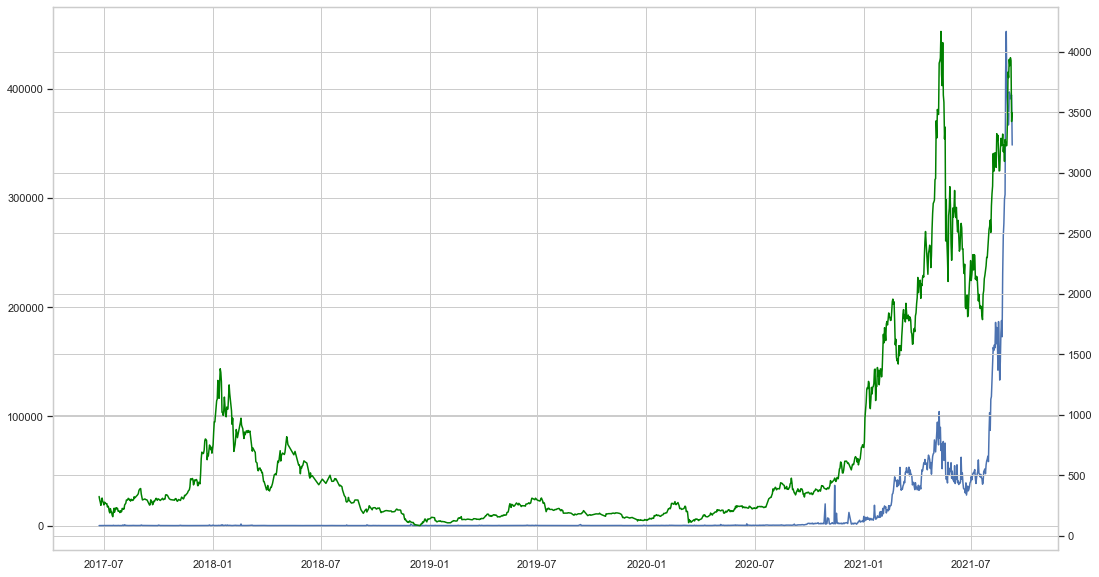

In [188]:
x=soldValuesDates_df["Date"]
y1=soldValuesDates_df["AmountDollar"]
y2=soldValuesDates_df["Price"]

fig, ax1 = plt.subplots(figsize=(18, 10))
ax2 = ax1.twinx()


ax1.plot(x, y1)
ax2.plot(x, y2, color='green');

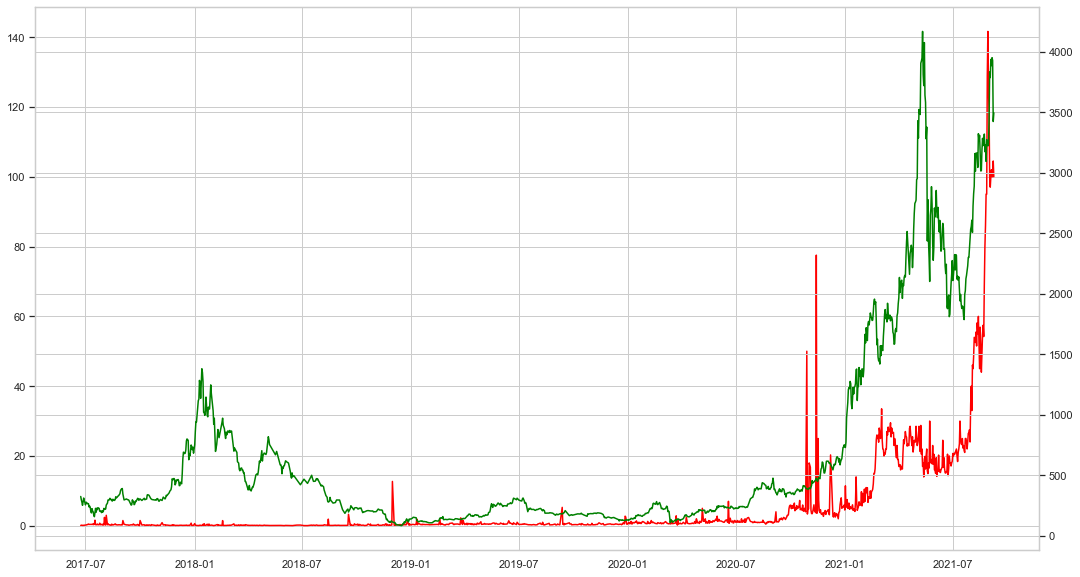

In [189]:
x=soldValuesDates_df["Date"]
y1=soldValuesDates_df["AmountETH"]
y2=soldValuesDates_df["Price"]

fig, ax1 = plt.subplots(figsize=(18, 10))
ax2 = ax1.twinx()


ax1.plot(x, y1, color='red')
ax2.plot(x, y2, color='green');

In [190]:
ethereumPrice_df=ethereum_df[['Date','Price']]
ethereumPrice_df=ethereumPrice_df.rename(columns={'Price':'priceETH'})
ethereumPrice_df.head(3)

,Date,priceETH
0,2021-09-08,3495.10
1,2021-09-07,3423.12
2,2021-09-06,3927.21


### MERGE CYBERPUNKS AND TRANSACTIONS

In [191]:
# Merge parameters and transacciones
mergedPunks = pd.merge(left=transactions_df, right=cyberpunks_df, how='left', left_on='idCryptoPunk', right_index=True)

In [192]:
mergedPunks

,idTransaction,idPropietario,TypeTransaction,idCryptoPunk,Owner,Reciever,AmountETH,AmountDollar,Date,rarity_rank,tipus,skin,traits,traits_count,owner
0,0,0xe73a1d,Bid Withdrawn,0,0xe73a1d,NaN,321.00,1260000.0,2021-09-04,2023,Female,Mid-skinned,"Blonde Bob, Earring, Green Eye Shadow, Hidden ...",4,0xE08c32
1,1,0xe73a1d,Bid,0,0xe73a1d,NaN,321.00,1140000.0,2021-09-01,2023,Female,Mid-skinned,"Blonde Bob, Earring, Green Eye Shadow, Hidden ...",4,0xE08c32
2,2,0x2e5e22,Bid Withdrawn,0,0x2e5e22,NaN,320.00,1110000.0,2021-09-01,2023,Female,Mid-skinned,"Blonde Bob, Earring, Green Eye Shadow, Hidden ...",4,0xE08c32
3,3,0x2e5e22,Bid,0,0x2e5e22,NaN,320.00,1100000.0,2021-09-01,2023,Female,Mid-skinned,"Blonde Bob, Earring, Green Eye Shadow, Hidden ...",4,0xE08c32
4,4,0x2e5e22,Bid Withdrawn,0,0x2e5e22,NaN,263.00,904481.0,2021-09-01,2023,Female,Mid-skinned,"Blonde Bob, Earring, Green Eye Shadow, Hidden ...",4,0xE08c32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161280,161329,0xa0a59c,Bid,9999,0xa0a59c,NaN,0.25,69.0,2017-07-03,9233,Female,Dark-skinned,"Mohawk, Nerd Glasses",2,0x0A383e
161281,161330,0x717403,Bid,9999,0x717403,NaN,0.20,51.0,2017-06-26,9233,Female,Dark-skinned,"Mohawk, Nerd Glasses",2,0x0A383e
161282,161331,ddaavvee,Bid,9999,ddaavvee,NaN,0.20,65.0,2017-06-23,9233,Female,Dark-skinned,"Mohawk, Nerd Glasses",2,0x0A383e
161283,161332,0x5b098b,Bid,9999,0x5b098b,NaN,0.15,50.0,2017-06-23,9233,Female,Dark-skinned,"Mohawk, Nerd Glasses",2,0x0A383e


In [193]:
mergedPunks.to_csv('mergedPunks.csv')

In [194]:
mergedPunks['Date'] = pd.to_datetime(mergedPunks['Date'])
ethereumPrice_df['Date'] = pd.to_datetime(ethereumPrice_df['Date'])
mergedPunks_df = pd.merge(mergedPunks, ethereumPrice_df, how='inner', left_on='Date', right_on='Date')
mergedPunks_df.head()

,idTransaction,idPropietario,TypeTransaction,idCryptoPunk,Owner,Reciever,AmountETH,AmountDollar,Date,rarity_rank,tipus,skin,traits,traits_count,owner,priceETH
0,0,0xe73a1d,Bid Withdrawn,0,0xe73a1d,NaN,321.0,1260000.0,2021-09-04,2023,Female,Mid-skinned,"Blonde Bob, Earring, Green Eye Shadow, Hidden ...",4,0xE08c32,3884.97
1,41,0xe73a1d,Bid Withdrawn,1,0xe73a1d,NaN,198.0,777132.0,2021-09-04,4352,Male,Dark-skinned,"Mohawk, Smile",2,0xB88F61,3884.97
2,179,snoopalo…,Bid,6,snoopalo…,NaN,1.0,3923.0,2021-09-04,7425,Male,Mid-skinned,Do-rag,1,0xC352B5,3884.97
3,393,snoopalo…,Bid,28,snoopalo…,NaN,0.5,1962.0,2021-09-04,8763,Male,Dark-skinned,"Big Shades, Crazy Hair",2,0xC352B5,3884.97
4,415,snoopalo…,Bid,35,snoopalo…,NaN,0.5,1962.0,2021-09-04,3351,Male,Dark-skinned,"Cigarette, Earring, Horned Rim Glasses, Normal...",5,0xC352B5,3884.97


In [195]:
mergedPunks_df.to_csv('TotalPunks.csv')

In [196]:
# Change owner columns names to avoid confusion
mergedPunks_df=mergedPunks_df.rename(columns={'Owner':'TransactionOwner','owner':'CurrentOwner'})
mergedPunks_df.head(1)

,idTransaction,idPropietario,TypeTransaction,idCryptoPunk,TransactionOwner,Reciever,AmountETH,AmountDollar,Date,rarity_rank,tipus,skin,traits,traits_count,CurrentOwner,priceETH
0,0,0xe73a1d,Bid Withdrawn,0,0xe73a1d,NaN,321.0,1260000.0,2021-09-04,2023,Female,Mid-skinned,"Blonde Bob, Earring, Green Eye Shadow, Hidden ...",4,0xE08c32,3884.97


In [197]:
pd.DataFrame(mergedPunks_df.groupby(["tipus","TypeTransaction"])["AmountDollar"].median())

AmountDollar
tipus  TypeTransaction              
Alien  Bid                     383.5
       Bid Withdrawn          4052.0
       Claimed                   0.0
       Offer Withdrawn           0.0
       Offered              157724.5
       Sold                   2650.0
       Transfer                  0.0
Ape    (Unwrap)                  0.0
       (Wrap)                    0.0
       Bid                     587.0
       Bid Withdrawn          3680.0
       Claimed                   0.0
       Offer Withdrawn           0.0
       Offered              117512.5
       Sold                   2212.0
       Transfer                  0.0
Female (Unwrap)                  0.0
       (Wrap)                    0.0
       Bid                    2648.0
       Bid Withdrawn         13294.0
       Claimed                   0.0
       Offer Withdrawn           0.0
       Offered               65486.0
       Sold                  35255.0
       Transfer                  0.0
Male   (Unwrap)                  0.0
       (Wrap)                    0.0
       Bid                   16895.5
       Bid Withdrawn         32512.0
       Claimed                   0.0
       Offer Withdrawn           0.0
       Offered               57802.0
       Sold                  18322.0
       Transfer                  0.0
Zombie (Unwrap)                  0.0
       (Wrap)                    0.0
       Bid                     420.0
       Bid Withdrawn          1964.0
       Claimed                   0.0
       Offer Withdrawn           0.0
       Offered              221074.5
       Sold                  17948.0
       Transfer                  0.0

In [198]:
pd.set_option('display.max_rows', 70)
pd.DataFrame(mergedPunks_df.groupby(["skin","TypeTransaction"])["AmountDollar"].median())

AmountDollar
skin           TypeTransaction              
Albino-skinned (Unwrap)                  0.0
               (Wrap)                    0.0
               Bid                   18246.0
               Bid Withdrawn         36173.0
               Claimed                   0.0
               Offer Withdrawn           0.0
               Offered               80916.0
               Sold                  35021.0
               Transfer                  0.0
Alien-skinned  Bid                     383.5
               Bid Withdrawn          4052.0
               Claimed                   0.0
               Offer Withdrawn           0.0
               Offered              157724.5
               Sold                   2650.0
               Transfer                  0.0
Ape-skinned    (Unwrap)                  0.0
               (Wrap)                    0.0
               Bid                     587.0
               Bid Withdrawn          3680.0
               Claimed                   0.0
               Offer Withdrawn           0.0
               Offered              117512.5
               Sold                   2212.0
               Transfer                  0.0
Dark-skinned   (Unwrap)                  0.0
               (Wrap)                    0.0
               Bid                    5937.0
               Bid Withdrawn         25262.0
               Claimed                   0.0
               Offer Withdrawn           0.0
               Offered               56602.0
               Sold                  22206.0
               Transfer                  0.0
Light-skinned  (Unwrap)                  0.0
               (Wrap)                    0.0
               Bid                    6241.0
               Bid Withdrawn         27588.0
               Claimed                   0.0
               Offer Withdrawn           0.0
               Offered               61565.0
               Sold                  29329.0
               Transfer                  0.0
Mid-skinned    (Unwrap)                  0.0
               (Wrap)                    0.0
               Bid                    6075.0
               Bid Withdrawn         27798.5
               Claimed                   0.0
               Offer Withdrawn           0.0
               Offered               57015.0
               Sold                  20661.0
               Transfer                  0.0
Zombie-skinned (Unwrap)                  0.0
               (Wrap)                    0.0
               Bid                     420.0
               Bid Withdrawn          1964.0
               Claimed                   0.0
               Offer Withdrawn           0.0
               Offered              221074.5
               Sold                  17948.0
               Transfer                  0.0

In [199]:
pd.DataFrame(mergedPunks_df.groupby(["traits_count","TypeTransaction"])["AmountDollar"].median())

AmountDollar
traits_count TypeTransaction              
0            Bid                     471.0
             Bid Withdrawn          2213.0
             Claimed                   0.0
             Offer Withdrawn           0.0
             Offered                6760.0
...                                    ...
9            Claimed                   0.0
             Offer Withdrawn           0.0
             Offered                2797.0
             Sold                    629.0
             Transfer                  0.0

[77 rows x 1 columns]

In [200]:
mergedPunks_df.describe()

,idTransaction,idCryptoPunk,AmountETH,AmountDollar,rarity_rank,traits_count,priceETH
count,161285.000000,161285.000000,161285.000000,1.612850e+05,161285.000000,161285.000000,161285.000000
mean,80669.917872,5317.588269,69.202206,1.418266e+05,4730.603683,2.845311,1615.187597
std,46574.389486,2779.883907,3747.753149,3.118454e+06,2927.894793,0.944229,1153.564242
min,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,83.810000
25%,40335.000000,2979.000000,0.020000,1.100000e+01,2220.000000,2.000000,344.030000
50%,80671.000000,5396.000000,6.660000,4.376000e+03,4640.000000,3.000000,1777.280000
75%,121006.000000,7705.000000,34.000000,7.453800e+04,7238.000000,3.000000,2532.190000
max,161333.000000,9999.000000,1000000.000000,5.812800e+08,10000.000000,9.000000,4167.780000


In [201]:
# Filter relevant columns to show statistics data
punksStat_df = mergedPunks_df[['AmountETH', 'AmountDollar', 'rarity_rank', 'traits_count']].copy()
punksStat_df.describe()

,AmountETH,AmountDollar,rarity_rank,traits_count
count,161285.000000,1.612850e+05,161285.000000,161285.000000
mean,69.202206,1.418266e+05,4730.603683,2.845311
std,3747.753149,3.118454e+06,2927.894793,0.944229
min,0.000000,0.000000e+00,1.000000,0.000000
25%,0.020000,1.100000e+01,2220.000000,2.000000
50%,6.660000,4.376000e+03,4640.000000,3.000000
75%,34.000000,7.453800e+04,7238.000000,3.000000
max,1000000.000000,5.812800e+08,10000.000000,9.000000


In [202]:
punksStat_df

,AmountETH,AmountDollar,rarity_rank,traits_count
0,321.00,1260000.0,2023,4
1,198.00,777132.0,4352,2
2,1.00,3923.0,7425,1
3,0.50,1962.0,8763,2
4,0.50,1962.0,3351,5
...,...,...,...,...
161280,0.15,34.0,4867,3
161281,0.60,80.0,4673,3
161282,0.25,70.0,9687,3
161283,0.50,86.0,3368,5


In [203]:
# Filter only 'Bid','Bid Withdrawn','Offered','Sold' transactions
pd.set_option('display.float_format', lambda x: '%.2f' % x) # set to decimals and no scientific notation
#pd.reset_option('display.float_format') # command to resert set_option
filteredTransact_df = mergedPunks_df[mergedPunks_df.TypeTransaction.isin(['Bid','Bid Withdrawn','Offered','Sold'])]

#Groupby mean
pd.DataFrame(filteredTransact_df.groupby(["tipus","TypeTransaction"])["AmountDollar"].mean())

AmountDollar
tipus  TypeTransaction              
Alien  Bid                 278329.90
       Bid Withdrawn       521079.68
       Offered           34736008.14
       Sold               1593972.30
Ape    Bid                 354991.63
       Bid Withdrawn       662034.23
       Offered            6044690.43
       Sold                431928.33
Female Bid                  42012.68
       Bid Withdrawn        54122.16
       Offered             258127.65
       Sold                 71215.64
Male   Bid                  55294.14
       Bid Withdrawn        68541.92
       Offered             268823.18
       Sold                 61099.03
Zombie Bid                 190415.29
       Bid Withdrawn       272385.55
       Offered            1206318.95
       Sold                437547.65

In [204]:
pd.DataFrame(filteredTransact_df.groupby(["skin","TypeTransaction"])["AmountDollar"].mean())

AmountDollar
skin           TypeTransaction              
Albino-skinned Bid                  53748.41
               Bid Withdrawn        68847.95
               Offered             319890.26
               Sold                 70285.83
Alien-skinned  Bid                 278329.90
               Bid Withdrawn       521079.68
               Offered           34736008.14
               Sold               1593972.30
Ape-skinned    Bid                 354991.63
               Bid Withdrawn       662034.23
               Offered            6044690.43
               Sold                431928.33
Dark-skinned   Bid                  46070.17
               Bid Withdrawn        56057.21
               Offered             267607.60
               Sold                 63781.47
Light-skinned  Bid                  53102.53
               Bid Withdrawn        66716.59
               Offered             256654.99
               Sold                 67551.04
Mid-skinned    Bid                  48204.77
               Bid Withdrawn        62002.52
               Offered             250285.78
               Sold                 60076.64
Zombie-skinned Bid                 190415.29
               Bid Withdrawn       272385.55
               Offered            1206318.95
               Sold                437547.65

In [205]:
pd.DataFrame(filteredTransact_df.groupby(["traits_count","TypeTransaction"])["AmountDollar"].mean())

AmountDollar
traits_count TypeTransaction              
0            Bid                  40444.92
             Bid Withdrawn        72386.26
             Offered             707500.37
             Sold                110708.09
1            Bid                  95776.07
             Bid Withdrawn       135652.53
             Offered            1302831.07
             Sold                138959.23
2            Bid                  65800.93
             Bid Withdrawn        85058.29
             Offered             234023.02
             Sold                 71430.24
3            Bid                  55971.92
             Bid Withdrawn        74220.03
             Offered             314681.27
             Sold                 62240.75
4            Bid                  48981.91
             Bid Withdrawn        65464.64
             Offered             255708.82
             Sold                 63950.54
5            Bid                  55143.31
             Bid Withdrawn        63508.02
             Offered             290925.61
             Sold                 84485.58
6            Bid                  49803.90
             Bid Withdrawn        61221.30
             Offered             364150.77
             Sold                124128.12
7            Bid                 107657.02
             Bid Withdrawn       104385.84
             Offered            1785395.18
             Sold                127754.67
9            Bid                  29749.31
             Bid Withdrawn        55180.50
             Offered            1060935.06
             Sold                   537.00

In [206]:
mergedPunks_df.head(1)

,idTransaction,idPropietario,TypeTransaction,idCryptoPunk,TransactionOwner,Reciever,AmountETH,AmountDollar,Date,rarity_rank,tipus,skin,traits,traits_count,CurrentOwner,priceETH
0,0,0xe73a1d,Bid Withdrawn,0,0xe73a1d,NaN,321.00,1260000.00,2021-09-04,2023,Female,Mid-skinned,"Blonde Bob, Earring, Green Eye Shadow, Hidden ...",4,0xE08c32,3884.97


In [207]:
mergedPunks_df[['AmountETH', 'AmountDollar', 'rarity_rank', 'traits_count']].describe()

,AmountETH,AmountDollar,rarity_rank,traits_count
count,161285.00,161285.00,161285.00,161285.00
mean,69.20,141826.55,4730.60,2.85
std,3747.75,3118453.86,2927.89,0.94
min,0.00,0.00,1.00,0.00
25%,0.02,11.00,2220.00,2.00
50%,6.66,4376.00,4640.00,3.00
75%,34.00,74538.00,7238.00,3.00
max,1000000.00,581280000.00,10000.00,9.00


In [208]:
mergedPunks_df.tipus.value_counts()

Male      100071
Female     57785
Zombie      2225
Ape          783
Alien        421
Name: tipus, dtype: int64

In [209]:
alien_df=mergedPunks_df[mergedPunks_df.tipus=='Alien']
alien_df[['AmountETH', 'AmountDollar', 'rarity_rank', 'traits_count']].describe()

,AmountETH,AmountDollar,rarity_rank,traits_count
count,421.00,421.00,421.00,421.00
mean,1038.73,2649607.53,13.97,2.06
std,7358.91,19587844.14,2.73,0.75
min,0.00,0.00,10.00,1.00
25%,0.25,135.00,12.00,1.00
50%,2.00,1646.00,14.00,2.00
75%,51.00,20143.00,17.00,3.00
max,125000.00,305230000.00,18.00,3.00


In [210]:
alienAmounts_df=pd.DataFrame(alien_df.groupby("Date")["AmountDollar","AmountETH"].mean())
alienAmounts_df.reset_index(level=0, inplace=True)
alienAmounts_df.head(1)

,Date,AmountDollar,AmountETH
0,2017-06-23,25396.20,77.70


In [211]:
alien_df.head()

,idTransaction,idPropietario,TypeTransaction,idCryptoPunk,TransactionOwner,Reciever,AmountETH,AmountDollar,Date,rarity_rank,tipus,skin,traits,traits_count,CurrentOwner,priceETH
166,122490,0xe16ec2,Bid,7804,0xe16ec2,NaN,0.01,9.00,2021-09-04,12,Alien,Alien-skinned,"Cap Forward, Pipe, Small Shades",3,0xf4b4A5,3884.97
646,122491,NaN,Offer Withdrawn,7804,NaN,NaN,0.00,0.00,2021-09-01,12,Alien,Alien-skinned,"Cap Forward, Pipe, Small Shades",3,0xf4b4A5,3832.73
2499,122515,0xffe678,Bid,7804,0xffe678,NaN,0.80,1722.00,2021-04-11,12,Alien,Alien-skinned,"Cap Forward, Pipe, Small Shades",3,0xf4b4A5,2151.42
4901,6132,jmg,Bid,635,jmg,NaN,30.00,4088.00,2020-01-09,18,Alien,Alien-skinned,"Bandana, Regular Shades",2,0x897aEA,137.92
4902,6133,natealex,Bid,635,natealex,NaN,29.00,4016.00,2020-01-09,18,Alien,Alien-skinned,"Bandana, Regular Shades",2,0x897aEA,137.92


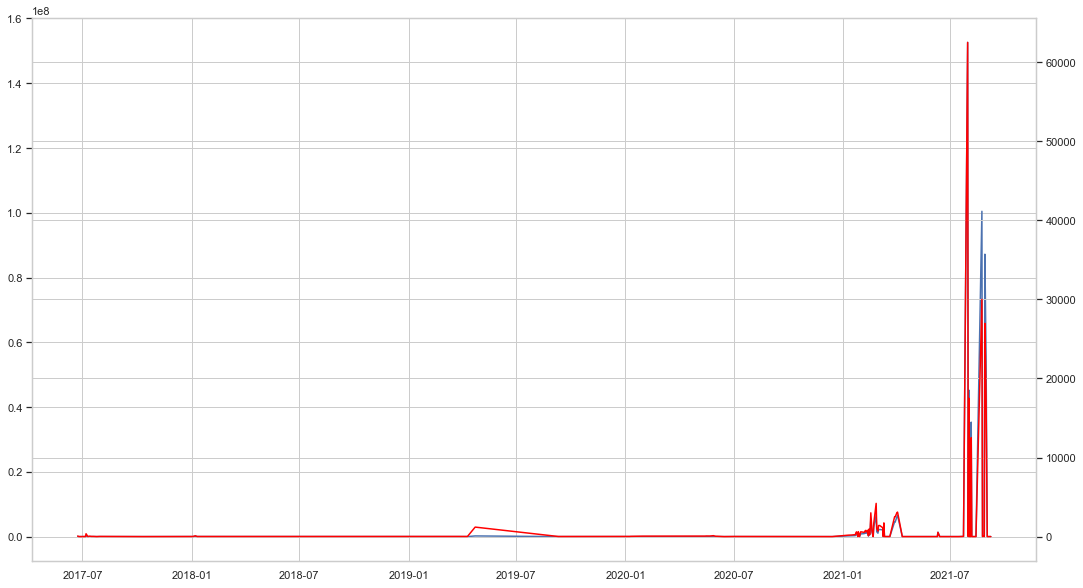

In [212]:
x=alienAmounts_df["Date"]
y1=alienAmounts_df["AmountDollar"]
y2=alienAmounts_df["AmountETH"]

fig, ax1 = plt.subplots(figsize=(18, 10))
ax2 = ax1.twinx()

ax1.plot(x, y1)
ax2.plot(x, y2, color='red');

In [213]:
ape_df=mergedPunks_df[mergedPunks_df.tipus=='Ape']
ape_df[['AmountETH', 'AmountDollar', 'rarity_rank', 'traits_count']].describe()

,AmountETH,AmountDollar,rarity_rank,traits_count
count,783.00,783.00,783.00,783.00
mean,560.86,1344085.60,40.17,1.73
std,4172.15,10715902.47,7.09,0.67
min,0.00,0.00,30.00,1.00
25%,0.23,200.00,34.00,1.00
50%,5.00,1527.00,39.00,2.00
75%,150.00,71429.00,46.00,2.00
max,100000.00,244180000.00,53.00,3.00


In [214]:
female_df=mergedPunks_df[mergedPunks_df.tipus=='Female']
female_df[['AmountETH', 'AmountDollar', 'rarity_rank', 'traits_count']].describe()

,AmountETH,AmountDollar,rarity_rank,traits_count
count,57785.00,57785.00,57785.00,57785.00
mean,83.30,121166.84,4020.88,2.89
std,6010.00,2753532.07,3265.24,1.03
min,0.00,0.00,2.00,0.00
25%,0.05,13.00,1293.00,2.00
50%,8.00,5330.00,2764.00,3.00
75%,35.00,77711.00,7874.00,3.00
max,1000000.00,537340000.00,9999.00,9.00


In [215]:
femaleAmounts_df=pd.DataFrame(female_df.groupby("Date")["AmountDollar","AmountETH"].mean())
femaleAmounts_df.reset_index(level=0, inplace=True)
femaleAmounts_df.head(1)

,Date,AmountDollar,AmountETH
0,2017-06-23,0.90,0.00


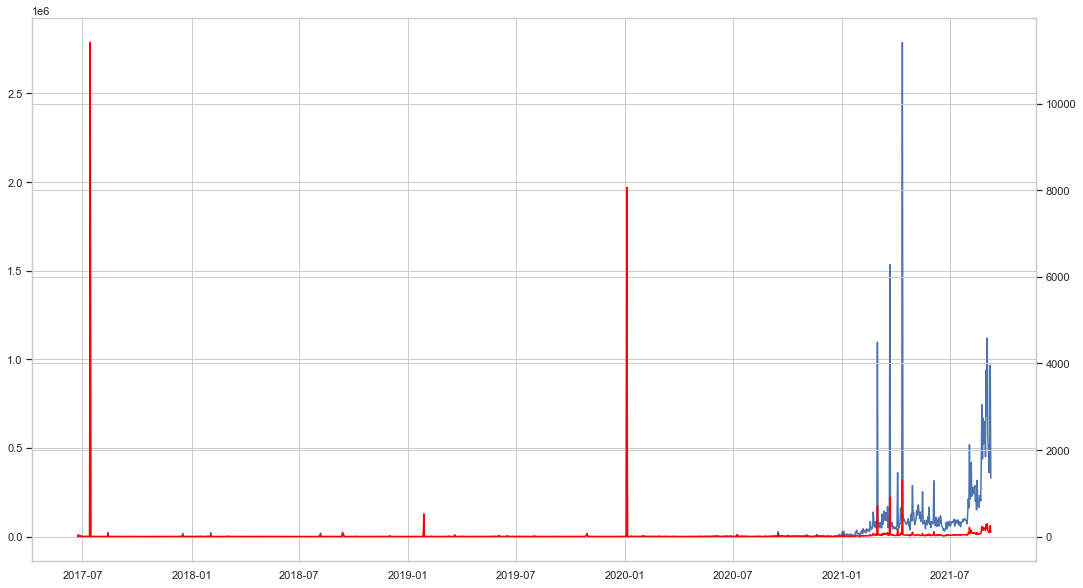

In [216]:
x=femaleAmounts_df["Date"]
y1=femaleAmounts_df["AmountDollar"]
y2=femaleAmounts_df["AmountETH"]

fig, ax1 = plt.subplots(figsize=(18, 10))
ax2 = ax1.twinx()

ax1.plot(x, y1)
ax2.plot(x, y2, color='red');

In [217]:
male_df=mergedPunks_df[mergedPunks_df.tipus=='Male']
male_df[['AmountETH', 'AmountDollar', 'rarity_rank', 'traits_count']].describe()

,AmountETH,AmountDollar,rarity_rank,traits_count
count,100071.00,100071.00,100071.00,100071.00
mean,50.95,128008.00,5290.82,2.84
std,1185.52,2950746.92,2528.51,0.89
min,0.00,0.00,1.00,0.00
25%,0.01,0.01,3463.00,2.00
50%,6.00,4457.00,5239.00,3.00
75%,32.35,73220.50,7283.00,3.00
max,215000.00,581280000.00,10000.00,7.00


In [218]:
zombie_df=mergedPunks_df[mergedPunks_df.tipus=='Zombie']
zombie_df[['AmountETH', 'AmountDollar', 'rarity_rank', 'traits_count']].describe()

,AmountETH,AmountDollar,rarity_rank,traits_count
count,2225.00,2225.00,2225.00,2225.00
mean,167.62,402282.03,509.71,2.45
std,483.61,1360008.25,71.89,0.78
min,0.00,0.00,54.00,1.00
25%,0.05,14.00,495.00,2.00
50%,2.49,699.00,517.00,2.00
75%,80.00,65452.00,542.00,3.00
max,8890.00,29110000.00,566.00,5.00


In [219]:
mergedPunks_df.skin.value_counts()

Dark-skinned      48444
Mid-skinned       46430
Light-skinned     46255
Albino-skinned    16727
Zombie-skinned     2225
Ape-skinned         783
Alien-skinned       421
Name: skin, dtype: int64

In [220]:
albinoSkin_df=mergedPunks_df[mergedPunks_df.skin=='Albino-skinned']
albinoSkin_df[['AmountETH', 'AmountDollar', 'rarity_rank', 'traits_count']].describe()

,AmountETH,AmountDollar,rarity_rank,traits_count
count,16727.00,16727.00,16727.00,16727.00
mean,54.40,149647.89,4997.87,2.68
std,631.96,2011766.39,2835.24,0.95
min,0.00,0.00,2.00,0.00
25%,0.11,44.00,2688.00,2.00
50%,16.00,28096.00,4888.00,3.00
75%,40.00,95118.50,7463.00,3.00
max,60000.00,190360000.00,9994.00,7.00


In [221]:
alienSkin_df=mergedPunks_df[mergedPunks_df.skin=='Alien-skinned']
alienSkin_df[['AmountETH', 'AmountDollar', 'rarity_rank', 'traits_count']].describe()

,AmountETH,AmountDollar,rarity_rank,traits_count
count,421.00,421.00,421.00,421.00
mean,1038.73,2649607.53,13.97,2.06
std,7358.91,19587844.14,2.73,0.75
min,0.00,0.00,10.00,1.00
25%,0.25,135.00,12.00,1.00
50%,2.00,1646.00,14.00,2.00
75%,51.00,20143.00,17.00,3.00
max,125000.00,305230000.00,18.00,3.00


In [222]:
apeSkin_df=mergedPunks_df[mergedPunks_df.skin=='Ape-skinned']
apeSkin_df[['AmountETH', 'AmountDollar', 'rarity_rank', 'traits_count']].describe()

,AmountETH,AmountDollar,rarity_rank,traits_count
count,783.00,783.00,783.00,783.00
mean,560.86,1344085.60,40.17,1.73
std,4172.15,10715902.47,7.09,0.67
min,0.00,0.00,30.00,1.00
25%,0.23,200.00,34.00,1.00
50%,5.00,1527.00,39.00,2.00
75%,150.00,71429.00,46.00,2.00
max,100000.00,244180000.00,53.00,3.00


In [223]:
darkSkin_df=mergedPunks_df[mergedPunks_df.skin=='Dark-skinned']
darkSkin_df[['AmountETH', 'AmountDollar', 'rarity_rank', 'traits_count']].describe()

,AmountETH,AmountDollar,rarity_rank,traits_count
count,48444.00,48444.00,48444.00,48444.00
mean,96.18,128542.59,4854.31,2.86
std,6579.74,3258593.92,2908.03,0.97
min,0.00,0.00,4.00,0.00
25%,0.00,0.00,2429.00,2.00
50%,5.50,2941.00,4613.00,3.00
75%,31.33,69986.75,7413.00,3.00
max,1000000.00,581280000.00,9996.00,9.00


In [224]:
lightSkin_df=mergedPunks_df[mergedPunks_df.skin=='Light-skinned']
lightSkin_df[['AmountETH', 'AmountDollar', 'rarity_rank', 'traits_count']].describe()

,AmountETH,AmountDollar,rarity_rank,traits_count
count,46255.00,46255.00,46255.00,46255.00
mean,46.27,121164.30,4773.68,2.88
std,837.58,2529531.04,2857.30,0.90
min,0.00,0.00,6.00,0.00
25%,0.05,13.00,2315.00,2.00
50%,7.50,5676.00,4778.00,3.00
75%,35.00,77101.50,7124.00,3.00
max,130000.00,489530000.00,9998.00,7.00


In [225]:
midSkin_df=mergedPunks_df[mergedPunks_df.skin=='Mid-skinned']
midSkin_df[['AmountETH', 'AmountDollar', 'rarity_rank', 'traits_count']].describe()

,AmountETH,AmountDollar,rarity_rank,traits_count
count,46430.00,46430.00,46430.00,46430.00
mean,47.43,117957.83,4786.47,2.90
std,1403.09,3048083.47,2907.41,0.94
min,0.00,0.00,1.00,0.00
25%,0.00,0.00,2310.00,2.00
50%,5.50,2844.00,4792.50,3.00
75%,31.50,70597.50,7249.00,3.00
max,250000.00,537340000.00,10000.00,7.00


In [226]:
zombieSkin_df=mergedPunks_df[mergedPunks_df.skin=='Zombie-skinned']
zombieSkin_df[['AmountETH', 'AmountDollar', 'rarity_rank', 'traits_count']].describe()

,AmountETH,AmountDollar,rarity_rank,traits_count
count,2225.00,2225.00,2225.00,2225.00
mean,167.62,402282.03,509.71,2.45
std,483.61,1360008.25,71.89,0.78
min,0.00,0.00,54.00,1.00
25%,0.05,14.00,495.00,2.00
50%,2.49,699.00,517.00,2.00
75%,80.00,65452.00,542.00,3.00
max,8890.00,29110000.00,566.00,5.00


In [227]:
mergedPunks_df.traits_count.value_counts()

3    69683
2    57072
4    21128
5     7207
1     4035
6     1161
7      532
0      418
9       49
Name: traits_count, dtype: int64

In [228]:
zombieSkin_df=mergedPunks_df[mergedPunks_df.skin=='Zombie-skinned']
zombieSkin_df[['AmountETH', 'AmountDollar', 'rarity_rank', 'traits_count']].describe()

,AmountETH,AmountDollar,rarity_rank,traits_count
count,2225.00,2225.00,2225.00,2225.00
mean,167.62,402282.03,509.71,2.45
std,483.61,1360008.25,71.89,0.78
min,0.00,0.00,54.00,1.00
25%,0.05,14.00,495.00,2.00
50%,2.49,699.00,517.00,2.00
75%,80.00,65452.00,542.00,3.00
max,8890.00,29110000.00,566.00,5.00


In [229]:
cyberpunks_df.traits_count.value_counts()

3    4280
2    3535
4    1371
5     404
1     333
6      57
7      11
0       8
9       1
Name: traits_count, dtype: int64

In [230]:
traitCount0_df=mergedPunks_df[mergedPunks_df.traits_count==0]
traitCount0_df[['AmountETH', 'AmountDollar', 'rarity_rank', 'traits_count']].describe()

,AmountETH,AmountDollar,rarity_rank,traits_count
count,418.00,418.00,418.00,418.00
mean,87.30,145405.33,5.20,0.00
std,438.78,974642.01,2.24,0.00
min,0.00,0.00,2.00,0.00
25%,0.50,137.75,4.00,0.00
50%,7.00,1492.50,5.00,0.00
75%,33.00,21684.25,7.00,0.00
max,6000.00,12230000.00,9.00,0.00


In [231]:
traitCount1_df=mergedPunks_df[mergedPunks_df.traits_count==1]
traitCount1_df[['AmountETH', 'AmountDollar', 'rarity_rank', 'traits_count']].describe()

,AmountETH,AmountDollar,rarity_rank,traits_count
count,4035.00,4035.00,4035.00,4035.00
mean,162.19,439944.28,3349.00,1.00
std,1657.52,5032909.09,2597.08,0.00
min,0.00,0.00,14.00,1.00
25%,0.10,53.00,538.00,1.00
50%,5.00,1962.00,4212.00,1.00
75%,45.00,81310.00,4522.00,1.00
max,42070.00,135430000.00,8117.00,1.00


In [232]:
traitCount2_df=mergedPunks_df[mergedPunks_df.traits_count==2]
traitCount2_df[['AmountETH', 'AmountDollar', 'rarity_rank', 'traits_count']].describe()

,AmountETH,AmountDollar,rarity_rank,traits_count
count,57072.00,57072.00,57072.00,57072.00
mean,81.45,118544.88,5000.23,2.00
std,5951.90,1601256.29,3081.82,0.00
min,0.00,0.00,10.00,2.00
25%,0.00,0.00,2349.00,2.00
50%,7.50,5599.00,4891.00,2.00
75%,33.50,74179.50,7807.00,2.00
max,1000000.00,217770000.00,10000.00,2.00


In [233]:
traitCount3_df=mergedPunks_df[mergedPunks_df.traits_count==3]
traitCount3_df[['AmountETH', 'AmountDollar', 'rarity_rank', 'traits_count']].describe()

,AmountETH,AmountDollar,rarity_rank,traits_count
count,69683.00,69683.00,69683.00,69683.00
mean,60.36,147181.17,4976.40,3.00
std,1758.54,4237323.49,2892.80,0.00
min,0.00,0.00,11.00,3.00
25%,0.01,0.01,2359.00,3.00
50%,5.80,3406.00,5193.00,3.00
75%,31.00,69478.00,7380.50,3.00
max,250000.00,581280000.00,9987.00,3.00


In [234]:
traitCount4_df=mergedPunks_df[mergedPunks_df.traits_count==4]
traitCount4_df[['AmountETH', 'AmountDollar', 'rarity_rank', 'traits_count']].describe()

,AmountETH,AmountDollar,rarity_rank,traits_count
count,21128.00,21128.00,21128.00,21128.00
mean,48.87,120542.69,4352.60,4.00
std,730.63,1224024.94,2610.90,0.00
min,0.00,0.00,64.00,4.00
25%,0.05,14.00,2092.00,4.00
50%,7.76,5153.00,4249.00,4.00
75%,35.00,77515.50,6295.00,4.00
max,88890.00,137430000.00,9958.00,4.00


In [235]:
traitCount5_df=mergedPunks_df[mergedPunks_df.traits_count==5]
traitCount5_df[['AmountETH', 'AmountDollar', 'rarity_rank', 'traits_count']].describe()

,AmountETH,AmountDollar,rarity_rank,traits_count
count,7207.00,7207.00,7207.00,7207.00
mean,54.53,138329.98,3086.09,5.00
std,512.66,906839.52,1651.35,0.00
min,0.00,0.00,111.00,5.00
25%,0.10,38.50,1974.00,5.00
50%,12.00,10141.00,3270.00,5.00
75%,55.00,128814.00,3500.00,5.00
max,42070.00,68930000.00,9579.00,5.00


In [236]:
traitCount6_df=mergedPunks_df[mergedPunks_df.traits_count==6]
traitCount6_df[['AmountETH', 'AmountDollar', 'rarity_rank', 'traits_count']].describe()

,AmountETH,AmountDollar,rarity_rank,traits_count
count,1161.00,1161.00,1161.00,1161.00
mean,55.21,137949.04,2346.79,6.00
std,142.37,398454.77,1239.49,0.00
min,0.00,0.00,20.00,6.00
25%,0.28,74.00,1219.00,6.00
50%,8.50,7239.00,3265.00,6.00
75%,65.00,132640.00,3289.00,6.00
max,3330.00,9730000.00,3348.00,6.00


In [237]:
traitCount7_df=mergedPunks_df[mergedPunks_df.traits_count==7]
traitCount7_df[['AmountETH', 'AmountDollar', 'rarity_rank', 'traits_count']].describe()

,AmountETH,AmountDollar,rarity_rank,traits_count
count,532.00,532.00,532.00,532.00
mean,223.09,552869.05,728.42,7.00
std,2617.88,7502206.45,1141.88,0.00
min,0.00,0.00,1.00,7.00
25%,0.55,144.00,22.00,7.00
50%,16.05,8735.00,29.00,7.00
75%,90.00,131613.50,1482.00,7.00
max,60000.00,171870000.00,3310.00,7.00


In [238]:
traitCount9_df=mergedPunks_df[mergedPunks_df.traits_count==9]
traitCount9_df[['AmountETH', 'AmountDollar', 'rarity_rank', 'traits_count']].describe()

,AmountETH,AmountDollar,rarity_rank,traits_count
count,49.00,49.00,49.00,49.00
mean,155.82,385036.04,26.00,9.00
std,857.13,2328490.99,0.00,0.00
min,0.00,0.00,26.00,9.00
25%,0.80,202.00,26.00,9.00
50%,4.40,758.00,26.00,9.00
75%,10.00,2919.00,26.00,9.00
max,5950.00,16260000.00,26.00,9.00


# PROVES ENRIC

In [239]:
mergedPunks_df

,idTransaction,idPropietario,TypeTransaction,idCryptoPunk,TransactionOwner,Reciever,AmountETH,AmountDollar,Date,rarity_rank,tipus,skin,traits,traits_count,CurrentOwner,priceETH
0,0,0xe73a1d,Bid Withdrawn,0,0xe73a1d,NaN,321.00,1260000.00,2021-09-04,2023,Female,Mid-skinned,"Blonde Bob, Earring, Green Eye Shadow, Hidden ...",4,0xE08c32,3884.97
1,41,0xe73a1d,Bid Withdrawn,1,0xe73a1d,NaN,198.00,777132.00,2021-09-04,4352,Male,Dark-skinned,"Mohawk, Smile",2,0xB88F61,3884.97
2,179,snoopalo…,Bid,6,snoopalo…,NaN,1.00,3923.00,2021-09-04,7425,Male,Mid-skinned,Do-rag,1,0xC352B5,3884.97
3,393,snoopalo…,Bid,28,snoopalo…,NaN,0.50,1962.00,2021-09-04,8763,Male,Dark-skinned,"Big Shades, Crazy Hair",2,0xC352B5,3884.97
4,415,snoopalo…,Bid,35,snoopalo…,NaN,0.50,1962.00,2021-09-04,3351,Male,Dark-skinned,"Cigarette, Earring, Horned Rim Glasses, Normal...",5,0xC352B5,3884.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161280,154486,trislit,Bid,9623,trislit,NaN,0.15,34.00,2018-10-10,4867,Male,Light-skinned,"Hoodie, Normal Beard Black, VR",3,0x3295df,226.30
161281,156122,satman,Sold,9697,_K_A_M_I…,satman,0.60,80.00,2020-04-01,4673,Male,Dark-skinned,"Cap Forward, Earring, Eye Mask",3,0xa39Fa3,135.66
161282,159968,NaN,Offered,9919,NaN,NaN,0.25,70.00,2018-08-21,9687,Female,Dark-skinned,"Black Lipstick, Earring, Messy Hair",3,0xC6a820,280.90
161283,160490,GoWest23,Sold,9943,antunes_…,GoWest23,0.50,86.00,2019-08-31,3368,Female,Albino-skinned,"Black Lipstick, Cigarette, Earring, Eye Patch,...",5,0xD387A6,171.62


In [240]:
mergedPunks_df.to_csv('mergedPunks.csv')

In [241]:
mergedPunks_sold_df=mergedPunks_df[mergedPunks_df.TypeTransaction=='Sold']
mergedPunks_sold_df

,idTransaction,idPropietario,TypeTransaction,idCryptoPunk,TransactionOwner,Reciever,AmountETH,AmountDollar,Date,rarity_rank,tipus,skin,traits,traits_count,CurrentOwner,priceETH
6,5849,0x285ce8,Sold,618,0xd7047c,0x285ce8,97.25,381146.00,2021-09-04,8420,Female,Dark-skinned,"Clown Eyes Green, Wild Hair",2,0xf75fcD,3884.97
12,12395,0x04fd71,Sold,1186,0x081e92,0x04fd71,98.00,378256.00,2021-09-04,5442,Female,Mid-skinned,"Bandana, Black Lipstick, Earring, Purple Eye S...",4,0x86B896,3884.97
17,13666,0xb56b7d,Sold,1316,0xb73440,0xb56b7d,105.00,406925.00,2021-09-04,5138,Male,Light-skinned,"Front Beard Dark, Frumpy Hair",2,0xb73440,3884.97
27,18552,0x04fd71,Sold,1633,0xec46dd,0x04fd71,100.00,385975.00,2021-09-04,9961,Male,Dark-skinned,"Bandana, Cigarette, Mole",3,0xEC46DD,3884.97
28,19652,ohana.et…,Sold,1711,0x1919db,ohana.et…,104.99,409519.00,2021-09-04,2539,Female,Dark-skinned,"Eye Mask, Straight Hair Dark",2,0xA397D0,3884.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161267,141397,PabloFM,Sold,8894,Hemba,PabloFM,0.12,26.00,2018-09-26,9274,Male,Light-skinned,"Mohawk, Mole",2,0x97B337,214.35
161268,159727,PabloFM,Sold,9910,Hemba,PabloFM,0.12,26.00,2018-09-26,2951,Male,Dark-skinned,"Mohawk Thin, Silver Chain",2,0x6611fE,214.35
161275,150125,0x6f1724,Sold,9378,Hemba,0x6f1724,0.12,35.00,2018-08-28,3359,Male,Mid-skinned,"Big Shades, Cigarette, Earring, Mole, Shaved Head",5,0x18E804,295.62
161281,156122,satman,Sold,9697,_K_A_M_I…,satman,0.60,80.00,2020-04-01,4673,Male,Dark-skinned,"Cap Forward, Earring, Eye Mask",3,0xa39Fa3,135.66


In [242]:
mergedPunks_sold_df.to_csv('mergedPunks_sold.csv')

In [243]:
soldPunks_byTipus_mean_df=pd.DataFrame(mergedPunks_sold_df.groupby(["tipus"])["AmountDollar"].mean())
soldPunks_byTipus_mean_df.reset_index(level=0, inplace=True)
soldPunks_byTipus_mean_df

,tipus,AmountDollar
0,Alien,1593972.30
1,Ape,431928.33
2,Female,71215.64
3,Male,61099.03
4,Zombie,437547.65


In [244]:
pd.DataFrame(filteredTransact_df.groupby(["tipus","TypeTransaction"])["AmountDollar"].mean())

AmountDollar
tipus  TypeTransaction              
Alien  Bid                 278329.90
       Bid Withdrawn       521079.68
       Offered           34736008.14
       Sold               1593972.30
Ape    Bid                 354991.63
       Bid Withdrawn       662034.23
       Offered            6044690.43
       Sold                431928.33
Female Bid                  42012.68
       Bid Withdrawn        54122.16
       Offered             258127.65
       Sold                 71215.64
Male   Bid                  55294.14
       Bid Withdrawn        68541.92
       Offered             268823.18
       Sold                 61099.03
Zombie Bid                 190415.29
       Bid Withdrawn       272385.55
       Offered            1206318.95
       Sold                437547.65

In [245]:
mergedPunks_bid_df=mergedPunks_df[mergedPunks_df.TypeTransaction=='Bid']

mergedPunks_bid_df

,idTransaction,idPropietario,TypeTransaction,idCryptoPunk,TransactionOwner,Reciever,AmountETH,AmountDollar,Date,rarity_rank,tipus,skin,traits,traits_count,CurrentOwner,priceETH
2,179,snoopalo…,Bid,6,snoopalo…,NaN,1.00,3923.00,2021-09-04,7425,Male,Mid-skinned,Do-rag,1,0xC352B5,3884.97
3,393,snoopalo…,Bid,28,snoopalo…,NaN,0.50,1962.00,2021-09-04,8763,Male,Dark-skinned,"Big Shades, Crazy Hair",2,0xC352B5,3884.97
4,415,snoopalo…,Bid,35,snoopalo…,NaN,0.50,1962.00,2021-09-04,3351,Male,Dark-skinned,"Cigarette, Earring, Horned Rim Glasses, Normal...",5,0xC352B5,3884.97
5,636,snoopalo…,Bid,70,snoopalo…,NaN,0.50,1962.00,2021-09-04,8742,Female,Mid-skinned,"Cigarette, Crazy Hair, Earring, Regular Shades",4,0xC352B5,3884.97
19,13668,0xaf3496,Bid,1316,0xaf3496,NaN,98.00,383153.00,2021-09-04,5138,Male,Light-skinned,"Front Beard Dark, Frumpy Hair",2,0xb73440,3884.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161262,134173,0xe199e2,Bid,8489,0xe199e2,NaN,0.02,21.00,2018-01-30,4703,Male,Dark-skinned,"Cap Forward, VR",2,0x38A161,1071.90
161264,138592,0x33f848,Bid,8729,0x33f848,NaN,0.15,34.00,2018-10-07,4986,Male,Dark-skinned,"Cigarette, Hoodie, Nerd Glasses",3,0x33F848,226.11
161273,146921,PB,Bid,9203,PB,NaN,3.00,427.00,2020-04-05,492,Zombie,Zombie-skinned,"Cap Forward, Clown Nose, Goat, Mole",4,0x8Dbbca,142.58
161276,151958,dafky200…,Bid,9476,dafky200…,NaN,0.06,27.00,2018-04-12,4928,Male,Mid-skinned,"Cigarette, Hoodie, VR",3,0xb4Bb41,494.03


In [246]:
bidPunks_byTipus_mean_df=pd.DataFrame(mergedPunks_bid_df.groupby(["tipus"])["AmountDollar"].mean())
bidPunks_byTipus_mean_df.reset_index(level=0, inplace=True)
bidPunks_byTipus_mean_df

,tipus,AmountDollar
0,Alien,278329.90
1,Ape,354991.63
2,Female,42012.68
3,Male,55294.14
4,Zombie,190415.29


In [247]:
mergedPunks_bidWithdrawn_df=mergedPunks_df[mergedPunks_df.TypeTransaction=='Bid Withdrawn']
mergedPunks_bidWithdrawn_df

,idTransaction,idPropietario,TypeTransaction,idCryptoPunk,TransactionOwner,Reciever,AmountETH,AmountDollar,Date,rarity_rank,tipus,skin,traits,traits_count,CurrentOwner,priceETH
0,0,0xe73a1d,Bid Withdrawn,0,0xe73a1d,NaN,321.00,1260000.00,2021-09-04,2023,Female,Mid-skinned,"Blonde Bob, Earring, Green Eye Shadow, Hidden ...",4,0xE08c32,3884.97
1,41,0xe73a1d,Bid Withdrawn,1,0xe73a1d,NaN,198.00,777132.00,2021-09-04,4352,Male,Dark-skinned,"Mohawk, Smile",2,0xB88F61,3884.97
11,11837,0xf3c358,Bid Withdrawn,1122,0xf3c358,NaN,11.00,43215.00,2021-09-04,8272,Male,Mid-skinned,"Mohawk Dark, Small Shades",2,0x6301Ad,3884.97
18,13667,0xaf3496,Bid Withdrawn,1316,0xaf3496,NaN,98.00,383674.00,2021-09-04,5138,Male,Light-skinned,"Front Beard Dark, Frumpy Hair",2,0xb73440,3884.97
24,15682,0x91338c,Bid Withdrawn,1446,0x91338c,NaN,130.00,504344.00,2021-09-04,649,Female,Dark-skinned,"Hot Lipstick, Pigtails",2,0x296E0C,3884.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161237,145692,Dude_Nak…,Bid Withdrawn,9135,Dude_Nak…,NaN,0.70,161.00,2020-06-26,6126,Male,Albino-skinned,"Chinstrap, Do-rag, Small Shades",3,0xaBF16c,229.67
161247,121953,0x0553de,Bid Withdrawn,7756,0x0553de,NaN,1.00,130.00,2019-01-14,527,Zombie,Zombie-skinned,"Do-rag, Horned Rim Glasses, Shadow Beard",3,0x6f35B0,127.53
161257,134172,0xe199e2,Bid Withdrawn,8489,0xe199e2,NaN,0.02,16.00,2018-02-06,4703,Male,Dark-skinned,"Cap Forward, VR",2,0x38A161,783.83
161274,150124,0x3ab536,Bid Withdrawn,9378,0x3ab536,NaN,0.09,18.00,2018-11-02,3359,Male,Mid-skinned,"Big Shades, Cigarette, Earring, Mole, Shaved Head",5,0x18E804,202.66


In [248]:
bidWithdrawnPunks_byTipus_mean_df=pd.DataFrame(mergedPunks_bidWithdrawn_df.groupby(["tipus"])["AmountDollar"].mean())
bidWithdrawnPunks_byTipus_mean_df.reset_index(level=0, inplace=True)
bidWithdrawnPunks_byTipus_mean_df

,tipus,AmountDollar
0,Alien,521079.68
1,Ape,662034.23
2,Female,54122.16
3,Male,68541.92
4,Zombie,272385.55


In [249]:
soldPunks_byTipus_mean_df

,tipus,AmountDollar
0,Alien,1593972.30
1,Ape,431928.33
2,Female,71215.64
3,Male,61099.03
4,Zombie,437547.65


In [250]:
bidPunks_byTipus_mean_df

,tipus,AmountDollar
0,Alien,278329.90
1,Ape,354991.63
2,Female,42012.68
3,Male,55294.14
4,Zombie,190415.29


In [251]:
bidWithdrawnPunks_byTipus_mean_df

,tipus,AmountDollar
0,Alien,521079.68
1,Ape,662034.23
2,Female,54122.16
3,Male,68541.92
4,Zombie,272385.55
